## About this document
This document contains the analysis and report for the Assessment of CASA0006-Data Science for Spatial Systems

The notebook requires approx XXX time to run (include specs of my PC)

Student ID: 21203086
Word count: XXX

--------------------------------------------------------------------------------------------------------------------------------

# TITLE XXXXXX

<a id="ID_intr"></a>
| [1.0 Introduction](#ID_intro) | [2.0 Literature review](#ID_lit) | [3.0 Research Question](#ID_RQ) | [4.0 Presentation of Data](#ID_data) | [5.0 Methodology](#ID_methods) | [6.0 Results](#ID_results) | [7.0 Discussion](#ID_disc) | [8.0 Conclusion](#ID_concl) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

<a id="ID_intro"></a>
## 1.0 | Introduction 

This paper studies .... 
quick summary
text text

According to the Understanding Inequalities project ''the housing market has a key role in "sorting" poorer households into areas with the worst pollution, schools, crime and employ-ment. ''(Housing | Understanding Inequalities, 2022). This study will therefore investigate if there is a relationship between a variety of indicators for environmental, health and socioeco-nomic features that compose a census tract and house prices in the same area. The case study chosen is California and the baseline assumption is that pollution, unemployment, and poor health statistics will be reflected in the overall house price trend. 

<a id="ID_lit"></a>
## 2.0 | Literature Review

Text text text


<a id="ID_RQ"></a>
## 3.0 | Research Question

R.Q.: Can house prices be predicted from data on environmental, health, and socioeconomic information of a census tract?

    RQ1 | text 
    RQ2 | text?

<a id="ID_data"></a>
## 4.0 | Presentation of Data

The data used for this analysis were obtained from the following sources:
* [CalEnviroScreen 4.0](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), downloaded 06 April 2021:

   - Who
   - Where from
   - What
   - Data 
   - Explanation/description

* [House Price Index Census Tracts](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx), downloaded 04 April 2021:

   - Who   [FEDERAL HOUSING FINACE AGENCY](https://www.fhfa.gov/)
   - Where from
   - What (http://proximityone.com/hpizip.htm)
   - Data 
   - House price index definition

According to the data dictionary provided on the website:
"The FHFA House Price Index (HPI) is a broad measure of the movement of single-family house prices.  The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975."



For ease of access the data has been saved in this [GitHub repository](https://github.com/DaphneBdn/dsss_repo) 

<a id="ID_methods"></a>
## 5.0 | Methodology

Outline of methodology....text text text
mention hedonic regression. Why I am NOT using it
https://www.investopedia.com/terms/h/hedonic-regression.asp

* data cleaning (and validation?)
* data pre-processing
* comprehnsive analysis

NOTES:

* OLS regression: why not
* Discuss NA values
* Discuss outliers and outlier robustness of each model 
* train/test spit
* validation methods

RF: Robust to Outliers and Non-linear Data. Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.[LINK](https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706)

Lasso: modification of LINEAR regression. 

### 5.1 Data Cleaning

In [237]:
# data manipulation and processing
#import os
import math
import numpy as np
import pandas as pd
import geopandas as gpd

# analysis

import re #regular expressions
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import statsmodels.api as sm


# Packages for visualisation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# reproducability settings
random_state = 42 
np.random.seed(random_state)

from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


<AxesSubplot:>

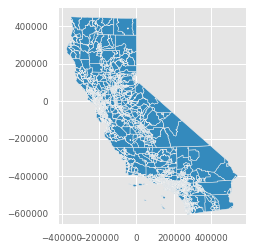

In [238]:
california = gpd.read_file('data/raw/calenviroscreen40shpf2021shp/CES4 Final Shapefile.shp')
california.plot()

In [240]:
california.tail()

Tract    ZIP       County  \
8030                       6,037,430,302.0000  91016  Los Angeles   
8031                       6,037,430,723.0000  91007  Los Angeles   
8032                       6,037,431,100.0000  91016  Los Angeles   
8033                       6,037,533,603.0000  90201  Los Angeles   
8034                       6,037,534,101.0000  90201  Los Angeles   

         ApproxLoc  TotPop19                                  CIscore  \
8030      Monrovia      5339                                  17.1248   
8031       Arcadia      4365                                  13.8420   
8032      Monrovia      6758                                  39.6978   
8033          Bell      6986                                  62.9310   
8034  Bell Gardens      2358                                  63.3150   

                                     CIscoreP  \
8030                                  30.6102   
8031                                  22.5668   
8032                                  74.5083   
8033                                  97.0499   
8034                                  97.2264   

                                        Ozone  \
8030                                   0.0624   
8031                                   0.0594   
8032                                   0.0613   
8033                                   0.0463   
8034                                   0.0472   

                                       OzoneP  \
8030                                  88.6994   
8031                                  79.9876   
8032                                  84.5800   
8033                                  46.9944   
8034                                  50.5414   

                                        PM2_5  ...  \
8030                                  11.8733  ...   
8031                                  11.8161  ...   
8032                                  11.8927  ...   
8033                                  12.0197  ...   
8034                                  12.0259  ...   

                                    Elderly65  \
8030                                  17.4752   
8031                                  10.4926   
8032                                   7.2951   
8033                                   9.4188   
8034                                  10.0933   

                                     Hispanic  \
8030                                  28.7132   
8031                                  10.9507   
8032                                  58.2273   
8033                                  91.4114   
8034                                  91.0941   

                                        White  \
8030                                  53.3995   
8031                                  26.3918   
8032                                  16.1438   
8033                                   6.9425   
8034                                   1.3147   

                                    AfricanAm  \
8030                                   1.5733   
8031                                   3.3677   
8032                                   8.9967   
8033                                   0.6728   
8034                                   1.9084   

                                     NativeAm  \
8030                                   0.0000   
8031                                   0.0000   
8032                                   0.0000   
8033                                   0.2577   
8034                                   0.0000   

                                    OtherMult  \
8030                                   7.1549   
8031                                   3.3677   
8032                                   1.1098   
8033                                   0.7157   
8034                                   0.0000   

                                   Shape_Leng  \
8030                               7,166.1306   
8031                               3,941.7818   
8032                               8,020.0913   
8033      

In [248]:
# Join with a spatial join
#cal_joined= gpd.sjoin(california, price20, how='left', op='within').drop(columns=['latitude','longitude','index_left'])
#cal_joined= gpd.sjoin(california, price20, how='left', op='within').drop(columns=['latitude','longitude','index_left'])
cal_joined= pd.merge(california, price20, left_on = "Tract", right_on = "tract", how = "left")
cal_joined.head(2)

Tract    ZIP         County    ApproxLoc  \
0                       6,083,002,103.0000  93454  Santa Barbara  Santa Maria   
1                       6,083,002,402.0000  93455  Santa Barbara  Santa Maria   

   TotPop19                                  CIscore  \
0      4495                                  36.0197   
1     13173                                  37.0307   

                                  CIscoreP  \
0                                  69.1629   
1                                  70.6379   

                                     Ozone  \
0                                   0.0342   
1                                   0.0352   

                                    OzoneP  \
0                                  10.5663   
1                                  11.5619   

                                     PM2_5  ...  \
0                                   7.5677  ...   
1                                   7.6248  ...   

                                  NativeAm  \
0                                   0.2670   
1                                   0.0000   

                                 OtherMult  \
0                                   1.3126   
1                                   0.9489   

                                Shape_Leng  \
0                               6,999.3577   
1                              19,100.5782   

                                Shape_Area  \
0                           2,847,611.3444   
1                          16,352,920.5440   

                                      AAPI  \
0                                   8.2091   
1                                   4.6990   

                                            geometry  \
0  POLYGON ((-39795.070 -341919.191, -38126.384 -...   
1  POLYGON ((-39795.070 -341919.191, -39803.632 -...   

                                     tract  state_abbr  \
0                       6,083,002,103.0000          CA   
1                                      NaN         NaN   

                                      year  \
0                               2,020.0000   
1                                      NaN   

                                       hpi  
0                                 218.0700  
1                                      NaN  

[2 rows x 71 columns]

In [249]:
SF = cal_joined[cal_joined["County"]=="San Francisco"]
SF.head(2)

Tract    ZIP         County  \
5237                       6,075,016,500.0000  94117  San Francisco   
5238                       6,075,016,400.0000  94117  San Francisco   

          ApproxLoc  TotPop19                                  CIscore  \
5237  San Francisco      5267                                  12.2450   
5238  San Francisco      4008                                   6.8043   

                                     CIscoreP  \
5237                                  18.5956   
5238                                   6.4170   

                                        Ozone  \
5237                                   0.0319   
5238                                   0.0306   

                                       OzoneP  \
5237                                   6.3846   
5238                                   3.8332   

                                        PM2_5  ...  \
5237                                   8.5647  ...   
5238                                   8.5831  ...   

                                     NativeAm  \
5237                                   0.0000   
5238                                   0.3992   

                                    OtherMult  \
5237                                   6.3604   
5238                                   5.2146   

                                   Shape_Leng  \
5237                               2,982.3632   
5238                               2,312.4744   

                                   Shape_Area  \
5237                             372,071.9754   
5238                             309,101.4955   

                                         AAPI  \
5237                                  11.1259   
5238                                   7.5848   

                                               geometry  tract  state_abbr  \
5237  POLYGON ((-214688.123 -24219.767, -215850.330 ...    NaN         NaN   
5238  POLYGON ((-213944.290 -24225.322, -214674.318 ...    NaN         NaN   

      year  hpi  
5237   NaN  NaN  
5238   NaN  NaN  

[2 rows x 71 columns]

In [251]:
LA = cal_joined[cal_joined["County"]=="Los Angeles"]

<AxesSubplot:>

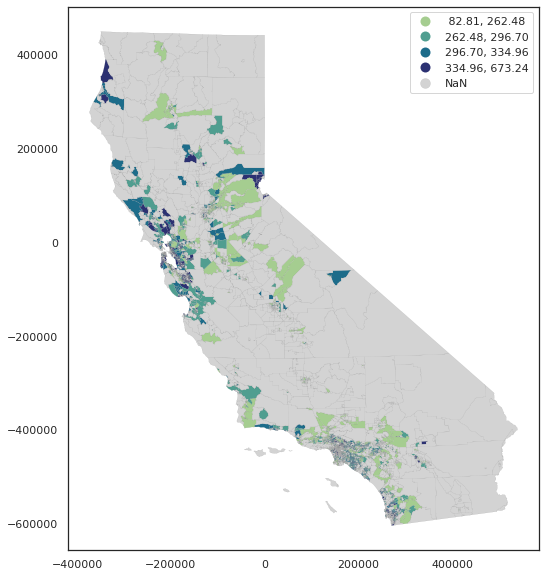

In [246]:
sns.set(style="white")
f,ax = plt.subplots(figsize=(20,10))
cal_joined.plot(column='hpi', scheme='quantiles', cmap='crest', edgecolor='grey',linewidth=0.1, k=4, ax=ax, legend=True,  missing_kwds={'color': 'lightgrey'})

<AxesSubplot:>

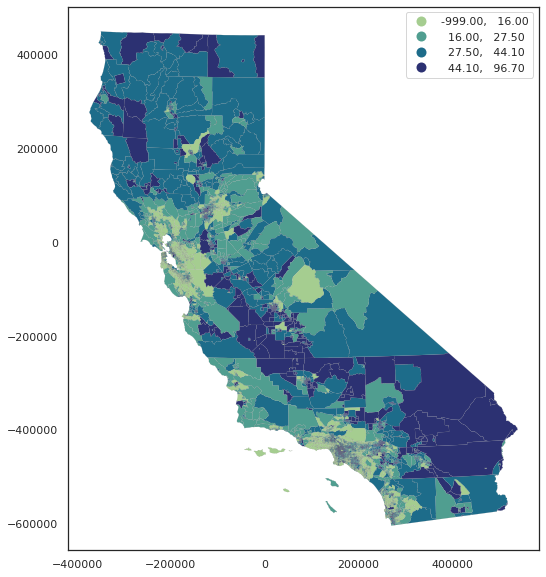

In [257]:
sns.set(style="white")
f,ax = plt.subplots(figsize=(20,10))
cal_joined.plot(column='Poverty', scheme='quantiles', cmap='crest', edgecolor='grey',linewidth=0.1, k=4, ax=ax, legend=True)

<AxesSubplot:>

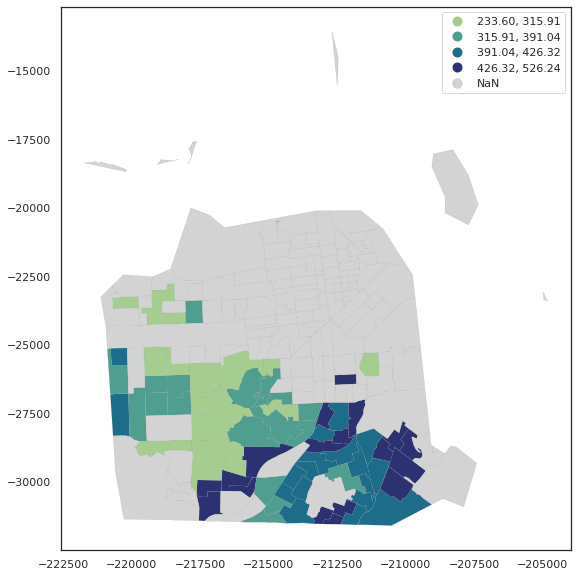

In [250]:
sns.set(style="white")
f,ax = plt.subplots(figsize=(20,10))
SF.plot(column='hpi', scheme='quantiles', cmap='crest', edgecolor='grey',linewidth=0.1, k=4, ax=ax, legend=True,  missing_kwds={'color': 'lightgrey'})

<AxesSubplot:>

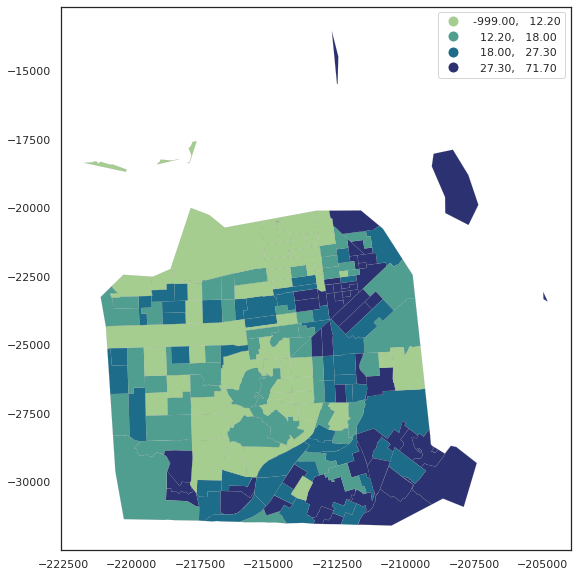

In [259]:
sns.set(style="white")
f,ax = plt.subplots(figsize=(20,10))
SF.plot(column='Poverty', scheme='quantiles', cmap='crest', edgecolor='grey',linewidth=0.1, k=4, ax=ax, legend=True)

<AxesSubplot:>

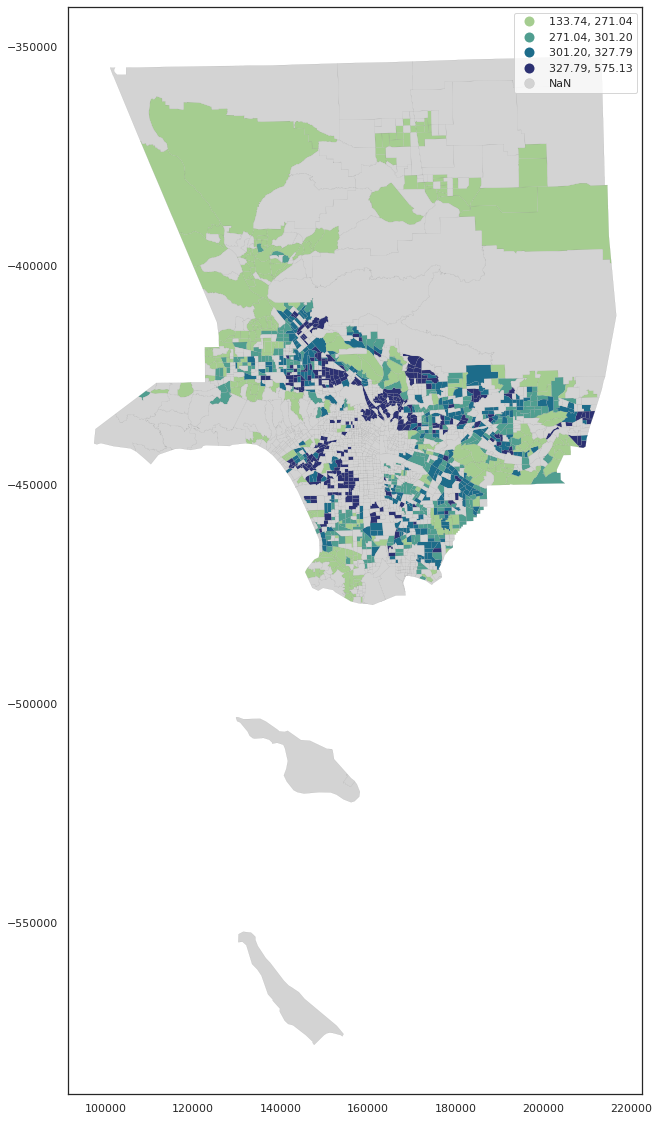

In [253]:
sns.set(style="white")
f,ax = plt.subplots(figsize=(20,20))
LA.plot(column='hpi', scheme='quantiles', cmap='crest', edgecolor='grey',linewidth=0.1, k=4, ax=ax, legend=True,  missing_kwds={'color': 'lightgrey'})

In [ ]:
f, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start a loop over all the variables of interest
for i, col in enumerate(columns):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    London_profiles.plot(
        column=col, 
        ax=ax,
        scheme='Quantiles', 
        linewidth=0,
        cmap="crest")
    
    # Remove axis
    ax.set_axis_off()
    
    # Set the axis title to the name of variable being plotted
    ax.set_title(axis_labels[i])


#export image
plt.savefig("Variables_maps.png", bbox_inches = 'tight')

--------------------------------------------------------

#### 5.1.1 House Price Index data

In [2]:
# Load in the House Price Index data 
#dfprice = pd.read_csv('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/HPI_AT_BDL_tract.csv')
dfprice = pd.read_csv('data/raw/HPI_AT_BDL_tract.csv')
dfprice.head(5)

tract state_abbr  year                            annual_change  \
0  1001020100         AL  1998                                      NaN   
1  1001020100         AL  1999                                  -5.6000   
2  1001020100         AL  2000                                   5.0600   
3  1001020100         AL  2001                                   7.0800   
4  1001020100         AL  2002                                   7.1100   

                                       hpi  hpi1990  \
0                                 100.0000      NaN   
1                                  94.4000      NaN   
2                                  99.1800      NaN   
3                                 106.2100      NaN   
4                                 113.7600      NaN   

                                   hpi2000  
0                                 100.8200  
1                                  95.1800  
2                                 100.0000  
3                                 107.0800  
4                                 114.7000

In [3]:
dfprice.tail(5)

tract state_abbr  year  \
1900550  56045951300         WY  2017   
1900551  56045951300         WY  2018   
1900552  56045951300         WY  2019   
1900553  56045951300         WY  2020   
1900554  56045951300         WY  2021   

                                   annual_change  \
1900550                                  -0.6100   
1900551                                   1.7900   
1900552                                   7.5800   
1900553                                  -0.2700   
1900554                                  15.3200   

                                             hpi  hpi1990  hpi2000  
1900550                                 175.7900      NaN      NaN  
1900551                                 178.9400      NaN      NaN  
1900552                                 192.5000      NaN      NaN  
1900553                                 191.9800      NaN      NaN  
1900554                                 221.3800      NaN      NaN

In [4]:
#check the size of the dataframe
dfprice.shape

(1900555, 7)

In [5]:
# check the datatype of each column 
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900555 entries, 0 to 1900554
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tract          int64  
 1   state_abbr     object 
 2   year           int64  
 3   annual_change  float64
 4   hpi            float64
 5   hpi1990        float64
 6   hpi2000        float64
dtypes: float64(4), int64(2), object(1)
memory usage: 101.5+ MB


In [409]:
dfprice.describe()

tract  \
count                           1,900,555.0000   
mean                       26,735,177,864.7755   
std                        15,951,002,393.1383   
min                         1,001,020,100.0000   
25%                        12,086,014,602.0000   
50%                        26,099,261,700.0000   
75%                        39,153,532,999.0000   
max                        56,045,951,300.0000   

                                          year  \
count                           1,900,555.0000   
mean                                2,005.6030   
std                                     9.9569   
min                                 1,975.0000   
25%                                 1,998.0000   
50%                                 2,006.0000   
75%                                 2,014.0000   
max                                 2,021.0000   

                                 annual_change  \
count                           1,760,778.0000   
mean                                    4.0588   
std                                     8.4450   
min                                   -69.0200   
25%                                    -0.4500   
50%                                     3.6900   
75%                                     8.3400   
max                                   161.1700   

                                           hpi  \
count                           1,849,439.0000   
mean                                  199.2799   
std                                   121.5691   
min                                    25.7200   
25%                                   126.0200   
50%                                   164.9300   
75%                                   229.6500   
max                                 2,300.6001   

                                       hpi1990  \
count                             928,870.0000   
mean                                  162.2173   
std                                    73.3383   
min                                    15.6300   
25%                                   103.0300   
50%                                   149.3000   
75%                                   203.0600   
max                                 1,040.4301   

                                       hpi2000  
count                           1,620,987.0000  
mean                                  123.8407  
std                                    49.7491  
min                                    10.5800  
25%                                    88.4600  
50%                                   114.6500  
75%                                   149.3600  
max                                   596.4100

After the first inspection of the data the key things to note are: 
* There are 1,048,575 entries in total, containing information for the whole State of Califonia
* There are multiple NA values which will need to be adressed. 
* The data covers the years 1975-2021
* There are no categorical variables

#### subseting/filtering

The dataset will be subsetted to:
* Extract census tracts of California only.
* Keep only 'hpi' as the dependent variable, as this is the HPI with the most recent base year
* Year: keep the most recent year with the least NA values

According to the data dictionary...

In [64]:
dfCAall = dfprice[dfprice['state_abbr']=="CA"]

In [65]:
dfCAall.shape

(264546, 7)

In [66]:
columns = dfCAall.columns
columns

Index(['tract', 'state_abbr', 'year', 'annual_change', 'hpi', 'hpi1990',
       'hpi2000'],
      dtype='object')

In [67]:
todrop=['annual_change', 'hpi','hpi2000']

In [68]:
dfCAall.drop(columns=todrop, inplace=True)
dfCAall

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tract state_abbr  year                                  hpi1990
77893   6001400100         CA  1986                                  66.2900
77894   6001400100         CA  1987                                  68.4600
77895   6001400100         CA  1988                                  86.0900
77896   6001400100         CA  1989                                  94.6900
77897   6001400100         CA  1990                                 100.0000
...            ...        ...   ...                                      ...
342434  6115041102         CA  2017                                      NaN
342435  6115041102         CA  2018                                      NaN
342436  6115041102         CA  2019                                      NaN
342437  6115041102         CA  2020                                      NaN
342438  6115041102         CA  2021                                      NaN

[264546 rows x 4 columns]

In [69]:
# rename the hpi1990 column for ease
dfCAall.rename(columns = {'hpi1990':'hpi'}, inplace = True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [70]:
# check the number of tracts
dfCAall['tract'].nunique()

7720

In [71]:
#check the NA values
dfCAall.isna().sum().sort_values(ascending=False)

hpi           71198
tract             0
state_abbr        0
year              0
dtype: int64

In [72]:
# Check the NAs in the HPI column in the 5 most recent years

yearlist = [2018,2019,2020,2021]

for i in yearlist: 
    dftemp = dfCAall[dfCAall['year']==i]
    print(f'Year {i} has {dftemp.hpi.isna().sum()} NA values in the HPI column')
    

Year 2018 has 2939 NA values in the HPI column
Year 2019 has 2796 NA values in the HPI column
Year 2020 has 2559 NA values in the HPI column
Year 2021 has 2574 NA values in the HPI column


------------------------------------------------------------------------------------------------------------

In [241]:
# keep HPI for 2020 as it is the year with the least NA values
price20 = dfCAall[dfCAall['year']==2020]
price20.head()

tract state_abbr  year                                      hpi
77927  6001400100         CA  2020                                 378.6500
77963  6001400200         CA  2020                                 389.6900
78006  6001400300         CA  2020                                 427.4100
78049  6001400400         CA  2020                                 462.3300
78085  6001400500         CA  2020                                 541.9100

In [75]:
dfCAall.head()

tract state_abbr  year                                      hpi
77893  6001400100         CA  1986                                  66.2900
77894  6001400100         CA  1987                                  68.4600
77895  6001400100         CA  1988                                  86.0900
77896  6001400100         CA  1989                                  94.6900
77897  6001400100         CA  1990                                 100.0000

In [77]:
dfCAall[dfCAall['year']==2018]

tract state_abbr  year                                      hpi
77925   6001400100         CA  2018                                 363.3300
77961   6001400200         CA  2018                                 375.1300
78004   6001400300         CA  2018                                 453.6200
78047   6001400400         CA  2018                                 512.5000
78083   6001400500         CA  2018                                 501.9600
...            ...        ...   ...                                      ...
342313  6115040901         CA  2018                                      NaN
342345  6115041001         CA  2018                                 249.6200
342376  6115041002         CA  2018                                      NaN
342406  6115041101         CA  2018                                      NaN
342435  6115041102         CA  2018                                      NaN

[7711 rows x 4 columns]

In [78]:
dfCAall[dfCAall['year']==2020]

tract state_abbr  year                                      hpi
77927   6001400100         CA  2020                                 378.6500
77963   6001400200         CA  2020                                 389.6900
78006   6001400300         CA  2020                                 427.4100
78049   6001400400         CA  2020                                 462.3300
78085   6001400500         CA  2020                                 541.9100
...            ...        ...   ...                                      ...
342315  6115040901         CA  2020                                      NaN
342347  6115041001         CA  2020                                 279.0600
342378  6115041002         CA  2020                                      NaN
342408  6115041101         CA  2020                                      NaN
342437  6115041102         CA  2020                                      NaN

[7717 rows x 4 columns]

In [82]:
hpi_change = dfCAall[(dfCAall['year']==2018) | (dfCAall['year']==2020)]
#price20 = dfCAall[(dfCAall['year']==2018) & (dfCAall['year']==2020)]
hpi_change


tract state_abbr  year                                      hpi
77925   6001400100         CA  2018                                 363.3300
77927   6001400100         CA  2020                                 378.6500
77961   6001400200         CA  2018                                 375.1300
77963   6001400200         CA  2020                                 389.6900
78004   6001400300         CA  2018                                 453.6200
...            ...        ...   ...                                      ...
342378  6115041002         CA  2020                                      NaN
342406  6115041101         CA  2018                                      NaN
342408  6115041101         CA  2020                                      NaN
342435  6115041102         CA  2018                                      NaN
342437  6115041102         CA  2020                                      NaN

[15428 rows x 4 columns]

In [275]:
hpi_change_pivot = hpi_change.pivot(index= 'tract', columns=['year'], values='hpi').reset_index()
hpi_change_pivot

year       tract                                     2018  \
0     6001400100                                 363.3300   
1     6001400200                                 375.1300   
2     6001400300                                 453.6200   
3     6001400400                                 512.5000   
4     6001400500                                 501.9600   
...          ...                                      ...   
7712  6115040901                                      NaN   
7713  6115041001                                 249.6200   
7714  6115041002                                      NaN   
7715  6115041101                                      NaN   
7716  6115041102                                      NaN   

year                                     2020  
0                                    378.6500  
1                                    389.6900  
2                                    427.4100  
3                                    462.3300  
4                                    541.9100  
...                                       ...  
7712                                      NaN  
7713                                 279.0600  
7714                                      NaN  
7715                                      NaN  
7716                                      NaN  

[7717 rows x 3 columns]

In [279]:
hpi_change_pivot['hpi_diff'] = hpi_change_pivot[2020]-hpi_change_pivot[2018]
hpi_change_pivot

year       tract                                     2018  \
0     6001400100                                 363.3300   
1     6001400200                                 375.1300   
2     6001400300                                 453.6200   
3     6001400400                                 512.5000   
4     6001400500                                 501.9600   
...          ...                                      ...   
7712  6115040901                                      NaN   
7713  6115041001                                 249.6200   
7714  6115041002                                      NaN   
7715  6115041101                                      NaN   
7716  6115041102                                      NaN   

year                                     2020  \
0                                    378.6500   
1                                    389.6900   
2                                    427.4100   
3                                    462.3300   
4                                    541.9100   
...                                       ...   
7712                                      NaN   
7713                                 279.0600   
7714                                      NaN   
7715                                      NaN   
7716                                      NaN   

year                                 hpi_diff  
0                                     15.3200  
1                                     14.5600  
2                                    -26.2100  
3                                    -50.1700  
4                                     39.9500  
...                                       ...  
7712                                      NaN  
7713                                  29.4400  
7714                                      NaN  
7715                                      NaN  
7716                                      NaN  

[7717 rows x 4 columns]

In [81]:
# check the number of tracts
#price20['tract'].nunique()

0

#### 5.1.2 CalEnviro Data

In [16]:
#env21= pd.read_excel('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")

env21= pd.read_excel('data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")
env21.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                             CES 4.0 Score  \
0                                  93.1836   
1                                  86.6538   
2                                  82.3939   
3                                  81.3279   
4                                  80.7455   

                        CES 4.0 Percentile  CES 4.0 Percentile Range  ...  \
0                                 100.0000  95-100% (highest scores)  ...   
1                                  99.9874  95-100% (highest scores)  ...   
2                                  99.9748  95-100% (highest scores)  ...   
3                                  99.9622  95-100% (highest scores)  ...   
4                                  99.9496  95-100% (highest scores)  ...   

                 Linguistic Isolation Pctl  \
0                                  79.3747   
1                                  95.5339   
2                                  81.5537   
3                                  78.7116   
4                                  86.5611   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Poverty Pctl  \
0                                  98.9196   
1                                  98.3920   
2                                  93.3920   
3                                  95.3518   
4                                  98.3040   

                              Unemployment  \
0                                  12.8000   
1                                  19.8000   
2                                   6.4000   
3                                  15.7000   
4                                  13.7000   

                         Unemployment Pctl  \
0                                  93.8313   
1                                  99.2061   
2                                  61.5305   
3                                  97.3451   
4                                  95.2889   

                            Housing Burden  \
0                                  30.3000   
1                                  31.2000   
2                                  20.3000   
3                                  35.4000   
4                                  32.7000   

                       Housing Burden Pctl  \
0                                  91.0393   
1                                  92.2814   
2                                  63.9670   
3                                  96.4132   
4                                  94.1572   

                               Pop. Char.   \
0                                  93.1551   
1                                  93.1654   
2                                  83.7518   
3                                  94.6412   
4                                  95.398

In [84]:
env21.shape

(8035, 56)

In [18]:
env21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [19]:
# extract the column names
cols=env21.columns
print(cols)
print()
print(f"The Enviro 3.0 dataset has {len(cols)} columns")

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [20]:
# check the NA values in the dataset 
env21.isna().sum().sort_values(ascending=False)

Unemployment Pctl              335
Unemployment                   335
Linguistic Isolation           320
Linguistic Isolation Pctl      320
Low Birth Weight Pctl          227
Low Birth Weight               227
Housing Burden Pctl            145
Housing Burden                 145
Pop. Char. Pctl                103
Education Pctl                 103
Education                      103
CES 4.0 Percentile Range       103
 CES 4.0 Percentile            103
CES 4.0 Score                  103
Pop. Char.                     103
Pop. Char. Score               103
Lead                            96
Lead Pctl                       96
Poverty Pctl                    75
Poverty                         75
Traffic Pctl                    35
Traffic                         35
Drinking Water                  28
Drinking Water Pctl             28
Cardiovascular Disease          11
Cardiovascular Disease Pctl     11
Asthma Pctl                     11
Asthma                          11
Solid Waste         

In [21]:
# drop the generalised indicators and percentiles, to work with the raw data

In [22]:
env21.drop("Pollution Burden", axis=1, inplace=True) 

In [23]:
env21.drop("Pollution Burden Score", axis=1, inplace=True)

In [24]:
dfsub = env21[env21.columns.drop(list(env21.filter(regex='Pctl')))]

In [25]:
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='Char')))]

In [26]:
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='CES')))]
dfsub.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                                     Ozone  \
0                                   0.0603   
1                                   0.0459   
2                                   0.0479   
3                                   0.0603   
4                                   0.0603   

                                     PM2.5  \
0                                  13.9063   
1                                  11.8841   
2                                  12.2516   
3                                  13.5209   
4                                  13.8190   

                                 Diesel PM  ...  Imp. Water Bodies  \
0                                   1.1227  ...                  0   
1                                   0.5381  ...                 13   
2                                   0.7808  ...                  7   
3                                   0.1738  ...                  0   
4                                   1.3897  ...                  0   

                               Solid Waste  \
0                                   6.0000   
1                                   9.2500   
2                                   4.8500   
3                                   5.7500   
4                                   0.0000   

                                    Asthma  \
0                                 129.5400   
1                                 105.8800   
2                                  76.1000   
3                                 139.4500   
4                                 139.0800   

                          Low Birth Weight  \
0                                   7.8000   
1                                   6.8800   
2                                   7.1100   
3                                  10.6500   
4                                  10.2500   

                    Cardiovascular Disease  \
0                                  21.4700   
1                                  20.2600   
2                                  20.8700   
3                                  22.6800   
4                                  22.6400   

                                 Education  \
0                                  44.5000   
1                                  46.4000   
2                                  52.2000   
3                                  41.4000   
4                                  43.6000   

                      Linguistic Isolation  \
0                                  16.0000   
1                                  29.7000   
2                                  17.1000   
3                                  15.7000   
4                                  20.0000   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Unempl

In [27]:
# drop rows with NA values
dfsub.dropna(axis=0, how='any', inplace=True)
#check it worked
dfsub.isna().sum().sort_values(ascending=False)

Census Tract              0
Total Population          0
Unemployment              0
Poverty                   0
Linguistic Isolation      0
Education                 0
Cardiovascular Disease    0
Low Birth Weight          0
Asthma                    0
Solid Waste               0
Imp. Water Bodies         0
Haz. Waste                0
Groundwater Threats       0
Cleanup Sites             0
Traffic                   0
Tox. Release              0
Pesticides                0
Lead                      0
Drinking Water            0
Diesel PM                 0
PM2.5                     0
Ozone                     0
Latitude                  0
Longitude                 0
Approximate Location      0
ZIP                       0
California County         0
Housing Burden            0
dtype: int64

In [85]:
#check the size of the dataframe after the NA removal
dfsub.shape

(7355, 28)

In [29]:
# check the number of tracts
dfsub['Census Tract'].nunique()

7355

NOTE 
According to [United Staes Census Bureau](https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/california.html), California has **8,057** census tracts

After NA removal:
The Enviro dataset lists 7355
The HPI lists 7717

# rename table and column to not change everywhere, should do it if i keep it

In [288]:
# rename the hpi1990 column for ease
hpi_change_pivot.rename(columns = {'hpi_diff':'hpi'}, inplace=True)

In [290]:
price20 = hpi_change_pivot
price20

year       tract                                     2018  \
0     6001400100                                 363.3300   
1     6001400200                                 375.1300   
2     6001400300                                 453.6200   
3     6001400400                                 512.5000   
4     6001400500                                 501.9600   
...          ...                                      ...   
7712  6115040901                                      NaN   
7713  6115041001                                 249.6200   
7714  6115041002                                      NaN   
7715  6115041101                                      NaN   
7716  6115041102                                      NaN   

year                                     2020  \
0                                    378.6500   
1                                    389.6900   
2                                    427.4100   
3                                    462.3300   
4                                    541.9100   
...                                       ...   
7712                                      NaN   
7713                                 279.0600   
7714                                      NaN   
7715                                      NaN   
7716                                      NaN   

year                                      hpi  
0                                     15.3200  
1                                     14.5600  
2                                    -26.2100  
3                                    -50.1700  
4                                     39.9500  
...                                       ...  
7712                                      NaN  
7713                                  29.4400  
7714                                      NaN  
7715                                      NaN  
7716                                      NaN  

[7717 rows x 4 columns]

In [299]:
# merge the enviro data with the HPI data with an inner join 
cal_joined = pd.merge(dfsub, price20, left_on = "Census Tract", right_on = "tract", how = "inner")
cal_joined

Census Tract  Total Population California County    ZIP  \
0       6077000700              4680       San Joaquin  95206   
1       6037204920              2751       Los Angeles  90023   
2       6019001202              4561           Fresno   93725   
3       6037291220              3640       Los Angeles  90247   
4       6037243100              6772       Los Angeles  90059   
...            ...               ...               ...    ...   
5591    6001421600              3617          Alameda   94708   
5592    6081609700              4936         San Mateo  94062   
5593    6085507302              2892       Santa Clara  95070   
5594    6081609601              3363         San Mateo  94070   
5595    6041126100              6195            Marin   94941   

                        Approximate Location  \
0                                   Stockton   
1                                Los Angeles   
2          Unincorporated Fresno County area   
3                                Los Angeles   
4                                Los Angeles   
...                                      ...   
5591                                Berkeley   
5592                            Redwood City   
5593  Unincorporated Santa Clara County area   
5594                              San Carlos   
5595                             Mill Valley   

                                    Longitude  \
0                                   -121.2879   
1                                   -118.1975   
2                                   -119.7410   
3                                   -118.2867   
4                                   -118.2351   
...                                       ...   
5591                                -122.2560   
5592                                -122.2803   
5593                                -122.0292   
5594                                -122.2833   
5595                                -122.5405   

                                     Latitude  \
0                                     37.9432   
1                                     34.0175   
2                                     36.7027   
3                                     33.8771   
4                                     33.9328   
...                                       ...   
5591                                  37.8840   
5592                                  37.4682   
5593                                  37.2383   
5594                                  37.4953   
5595                                  37.9122   

                                        Ozone  \
0                                      0.0459   
1                                      0.0479   
2                                      0.0613   
3                                      0.0413   
4                                      0.0438   
...                                       ...   
5591                                   0.0294   
5592                                   0.0330   
5593                                   0.0398   
5594                                   0.0319   
5595                                   0.0319   

                                        PM2.5  \
0                                     11.8841   
1                                     12.2516   
2                                     13.9661   
3                                     12.0661   
4                                     12.0902   
...                                       ...   
5591                                   8.9978   
5592                                   7.9757   
5593                                   7.2742   
5594                                   8.0768   
5595                                   8.4158   

                                    Diesel PM  ...  \
0                                      0.5381  ...   
1                                      0.7808  ...   
2                                      0.2029  ...   
3                                      0.6369  ...   
4                     

In [300]:
#cal_joined[cal_joined.isna().any(axis=1)]

In [301]:
# the rows with missing information after the join will need to be dropped
cal_joined.dropna(axis=0, how='any', inplace=True)
cal_joined.shape

(3747, 32)

In [302]:
# print out the column names
cal_joined.columns

Index([          'Census Tract',       'Total Population',
            'California County',                    'ZIP',
         'Approximate Location',              'Longitude',
                     'Latitude',                  'Ozone',
                        'PM2.5',              'Diesel PM',
               'Drinking Water',                   'Lead',
                   'Pesticides',           'Tox. Release',
                      'Traffic',          'Cleanup Sites',
          'Groundwater Threats',             'Haz. Waste',
            'Imp. Water Bodies',            'Solid Waste',
                       'Asthma',       'Low Birth Weight',
       'Cardiovascular Disease',              'Education',
         'Linguistic Isolation',                'Poverty',
                 'Unemployment',         'Housing Burden',
                        'tract',                     2018,
                           2020,                    'hpi'],
      dtype='object')

In [303]:
# create a list of the columns to be dropped, in order to keep only the dependent and independent variabels

todrop = ['Census Tract', 'Total Population', 'California County', 'ZIP','Approximate Location', 'Longitude', 'Latitude', 'tract'
         # , 'state_abbr'
         # ,'year'
          ,2018
          ,2020
         ]

In [304]:
dfall = cal_joined.drop(columns=todrop)
dfall.head()

Ozone  \
3                                    0.0413   
6                                    0.0561   
8                                    0.0454   
12                                   0.0419   
14                                   0.0483   

                                      PM2.5  \
3                                   12.0661   
6                                   12.1126   
8                                   12.0487   
12                                  12.0623   
14                                  12.1507   

                                  Diesel PM  \
3                                    0.6369   
6                                    0.1961   
8                                    0.7018   
12                                   0.6934   
14                                   0.9377   

                             Drinking Water  \
3                                  805.5744   
6                                  856.8068   
8                                  668.9440   
12                                 806.8046   
14                                 524.0384   

                                       Lead  \
3                                   66.0691   
6                                   53.4788   
8                                   93.1372   
12                                  78.2716   
14                                  91.7577   

                                 Pesticides  \
3                                   66.4967   
6                                6,840.3760   
8                                    0.0000   
12                                  25.9856   
14                                   0.0000   

                               Tox. Release  \
3                               19,774.7897   
6                                   99.2163   
8                                6,048.8031   
12                              58,279.0821   
14                               3,547.5732   

                                    Traffic  \
3                                3,455.2393   
6                                1,013.6639   
8                                2,127.7817   
12                               2,511.5948   
14                               2,783.1390   

                              Cleanup Sites  \
3                                   16.0000   
6                                   14.0000   
8                                  109.1000   
12                                  16.6500   
14                                 103.9000   

                        Groundwater Threats  ...  \
3                                   37.5500  ...   
6                                   73.9500  ...   
8                                   55.5500  ...   
12                                  60.3000  ...   
14                                  47.7500  ...   

                                Solid Waste  \
3                                    4.2000   
6                                   14.5000   
8                                   18.7500   
12                                  15.9500   
14                                   6.2500   

                                     Asthma  \
3                                   64.7700   
6                                   77.6500   
8                                   50.8300   
12                                  70.4600   
14                                  56.5700   

                           Low Birth Weight  \
3                                    7.7700   
6                                    5.6000   
8                                    5.4800   
12                                   5.8100   
14                                   6.3800   

                     Cardiovascular Disease  \
3                                   12.9900   
6                                   24.3700   
8                                   17.7000   
12                                  13.6000   
14                                  18.9900   

                                  Education  \

In [217]:
#dfall.set_index('Census Tract', inplace=True)

In [218]:
#dfall.head(3)

Ozone  \
Census Tract                                            
6037291220                                     0.0413   
6099003700                                     0.0561   
6037536104                                     0.0454   

                                                PM2.5  \
Census Tract                                            
6037291220                                    12.0661   
6099003700                                    12.1126   
6037536104                                    12.0487   

                                            Diesel PM  \
Census Tract                                            
6037291220                                     0.6369   
6099003700                                     0.1961   
6037536104                                     0.7018   

                                       Drinking Water  \
Census Tract                                            
6037291220                                   805.5744   
6099003700                                   856.8068   
6037536104                                   668.9440   

                                                 Lead  \
Census Tract                                            
6037291220                                    66.0691   
6099003700                                    53.4788   
6037536104                                    93.1372   

                                           Pesticides  \
Census Tract                                            
6037291220                                    66.4967   
6099003700                                 6,840.3760   
6037536104                                     0.0000   

                                         Tox. Release  \
Census Tract                                            
6037291220                                19,774.7897   
6099003700                                    99.2163   
6037536104                                 6,048.8031   

                                              Traffic  \
Census Tract                                            
6037291220                                 3,455.2393   
6099003700                                 1,013.6639   
6037536104                                 2,127.7817   

                                        Cleanup Sites  \
Census Tract                                            
6037291220                                    16.0000   
6099003700                                    14.0000   
6037536104                                   109.1000   

                                  Groundwater Threats  ...  \
Census Tract                                           ...   
6037291220                                    37.5500  ...   
6099003700                                    73.9500  ...   
6037536104                                    55.5500  ...   

                                          Solid Waste  \
Census Tract                                            
6037291220                                     4.2000   
6099003700                                    14.5000   
6037536104                                    18.7500   

                                               Asthma  \
Census Tract                                            
6037291220                                    64.7700   
6099003700                                    77.6500   
6037536104                                    50.8300   

                                     Low Birth Weight  \
Census Tract                                            
6037291220                                     7.7700   
6099003700                                     5.6000   
6037536104                                     5.4800   

                               Cardiovascular Disease  \
Census Tract                                            
6037291220                                    12.9900   
6099003700                                    24.3700   
6037536104                                    17.7000   

                   

In [227]:
hpi_sorted = dfall.sort_values(["hpi"], ascending=False)
hpi_sorted[0:10]

Census Tract                                    Ozone  \
3092    6001423400                                   0.0294   
2025    6001423300                                   0.0294   
2103    6081611700                                   0.0342   
1895    6001401100                                   0.0294   
1058    6037218300                                   0.0463   
915     6037219020                                   0.0454   
3837    6001400500                                   0.0294   
2468    6001422100                                   0.0294   
1967    6081611800                                   0.0342   
2208    6001423100                                   0.0294   

                                        PM2.5  \
3092                                   9.1457   
2025                                   9.1457   
2103                                   8.2003   
1895                                   9.6737   
1058                                  11.8510   
915                                   11.9883   
3837                                   9.3697   
2468                                   9.0904   
1967                                   8.2279   
2208                                   9.1280   

                                    Diesel PM  \
3092                                   0.2787   
2025                                   0.3250   
2103                                   0.4529   
1895                                   0.6374   
1058                                   0.2262   
915                                    0.0809   
3837                                   0.2328   
2468                                   0.3100   
1967                                   0.1407   
2208                                   0.2117   

                               Drinking Water  \
3092                                 110.4124   
2025                                 110.4124   
2103                                 315.3536   
1895                                 110.4124   
1058                                 787.9403   
915                                  787.9403   
3837                                 110.4124   
2468                                 110.4124   
1967                                 407.2094   
2208                                 110.4124   

                                         Lead  \
3092                                  70.2782   
2025                                  71.3473   
2103                                  89.7201   
1895                                  60.7948   
1058                                  82.5456   
915                                   94.9595   
3837                                  61.5569   
2468                                  57.0740   
1967                                  92.8217   
2208                                  60.1035   

                                   Pesticides  \
3092                                   0.0000   
2025                                   0.0000   
2103                                   0.0000   
1895                                   0.0000   
1058                                   0.0000   
915                                    0.0000   
3837                                   0.0000   
2468                                   0.0000   
1967                                   0.0000   
2208                                   0.0000   

                                 Tox. Release  \
3092                                 701.3893   
2025                                 705.8800   
2103                                 116.7723   
1895                                 569.1847   
1058                               1,933.3199   
915                                2,350.4434   
3837                                 641.7227   
2468                                 846.2784   
1967                                 104.9788   
2208                                 753.7387   

                                      Traffic  \
3092                   

In [234]:
ozone_sorted = dfall.sort_values(["Poverty"], ascending=True)
ozone_sorted[0:10]

Census Tract                                    Ozone  \
3840    6001443301                                   0.0398   
5565    6001426100                                   0.0294   
5578    6081609500                                   0.0319   
4683    6071000815                                   0.0646   
5354    6085508203                                   0.0381   
5295    6001442000                                   0.0398   
4875    6081606500                                   0.0342   
4729    6085507807                                   0.0381   
5343    6001451505                                   0.0454   
5421    6013345116                                   0.0398   

                                        PM2.5  \
3840                                   8.4411   
5565                                   9.2061   
5578                                   8.1911   
4683                                  13.3381   
5354                                   8.1529   
5295                                   8.2567   
4875                                   8.4279   
4729                                   8.0717   
5343                                   8.5599   
5421                                   8.5828   

                                    Diesel PM  \
3840                                   0.4291   
5565                                   0.0783   
5578                                   0.0735   
4683                                   0.1404   
5354                                   0.2279   
5295                                   0.1272   
4875                                   0.1130   
4729                                   0.1437   
5343                                   0.0895   
5421                                   0.3080   

                               Drinking Water  \
3840                                 259.0733   
5565                                 110.4124   
5578                                 254.8061   
4683                                 716.6439   
5354                                 318.4752   
5295                                 263.5663   
4875                                 386.5066   
4729                                 332.6289   
5343                                 467.0228   
5421                                 110.4124   

                                         Lead  \
3840                                  17.9906   
5565                                  56.7358   
5578                                  44.3016   
4683                                   8.3806   
5354                                  32.4545   
5295                                  16.8913   
4875                                  59.6437   
4729                                  29.7039   
5343                                  10.0810   
5421                                   5.1544   

                                   Pesticides  \
3840                                   0.0045   
5565                                   0.0000   
5578                                   0.0000   
4683                                   0.0000   
5354                                   0.0840   
5295                                   0.0080   
4875                                   0.0000   
4729                                   0.0000   
5343                                   0.0000   
5421                                   0.0000   

                                 Tox. Release  \
3840                                 462.6760   
5565                                 517.9100   
5578                                 131.5080   
4683                                 548.3360   
5354                                 426.1660   
5295                                 142.0230   
4875                                 209.6680   
4729                               1,042.4323   
5343                                 110.2247   
5421                                 363.7173   

                                      Traffic  \
3840                   

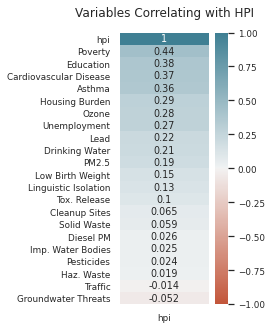

In [305]:
plt.figure(figsize=(2,5))
sns.set(font_scale=.8)
mypalette = sns.diverging_palette(20,220, as_cmap=True)
heatmap = sns.heatmap(dfall.corr()[['hpi']].sort_values(by='hpi', ascending=False), vmin=-1, vmax=1, annot=True, cmap=mypalette)
heatmap.set_title('Variables Correlating with HPI', fontdict={'fontsize':12}, pad=16);
#plt.savefig('Survival_rate_corr_S1.png', dpi=300, bbox_inches='tight')

#### 5.1.3 summary statistics

In [306]:
dfall.describe()

Ozone  \
count                               3,747.0000   
mean                                    0.0483   
std                                     0.0102   
min                                     0.0266   
25%                                     0.0413   
50%                                     0.0468   
75%                                     0.0561   
max                                     0.0731   

                                         PM2.5  \
count                               3,747.0000   
mean                                   10.0934   
std                                     2.0220   
min                                     4.1178   
25%                                     8.5917   
50%                                     9.8397   
75%                                    11.8834   
max                                    15.8143   

                                     Diesel PM  \
count                               3,747.0000   
mean                                    0.1893   
std                                     0.1899   
min                                     0.0007   
25%                                     0.0673   
50%                                     0.1350   
75%                                     0.2513   
max                                     2.6053   

                                Drinking Water  \
count                               3,747.0000   
mean                                  461.3835   
std                                   214.6566   
min                                    32.5689   
25%                                   291.5255   
50%                                   418.1421   
75%                                   663.2608   
max                                 1,134.7667   

                                          Lead  \
count                               3,747.0000   
mean                                   47.7424   
std                                    21.7121   
min                                     1.0324   
25%                                    30.2104   
50%                                    46.9965   
75%                                    64.9469   
max                                    97.7963   

                                    Pesticides  \
count                               3,747.0000   
mean                                  244.1948   
std                                 2,363.8606   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.0862   
max                                80,811.0894   

                                  Tox. Release  \
count                               3,747.0000   
mean                                1,579.3759   
std                                 3,283.7485   
min                                     0.0000   
25%                                   116.7720   
50%                                   480.4710   
75%                                 1,639.1742   
max                                80,652.8900   

                                       Traffic  \
count                               3,747.0000   
mean                                1,155.4255   
std                                 1,098.6812   
min                                    53.6972   
25%                                   580.8908   
50%                                   893.3941   
75%                                 1,454.2212   
max                                45,752.0000   

                                 Cleanup Sites  \
count                               3,747.0000   
mean                                    7.1154   
std                                    13.2381   
min                                     0.0000   
25%                                     0.0000   
50%                                     1.2500   
75%                                     9.0000   
max                              

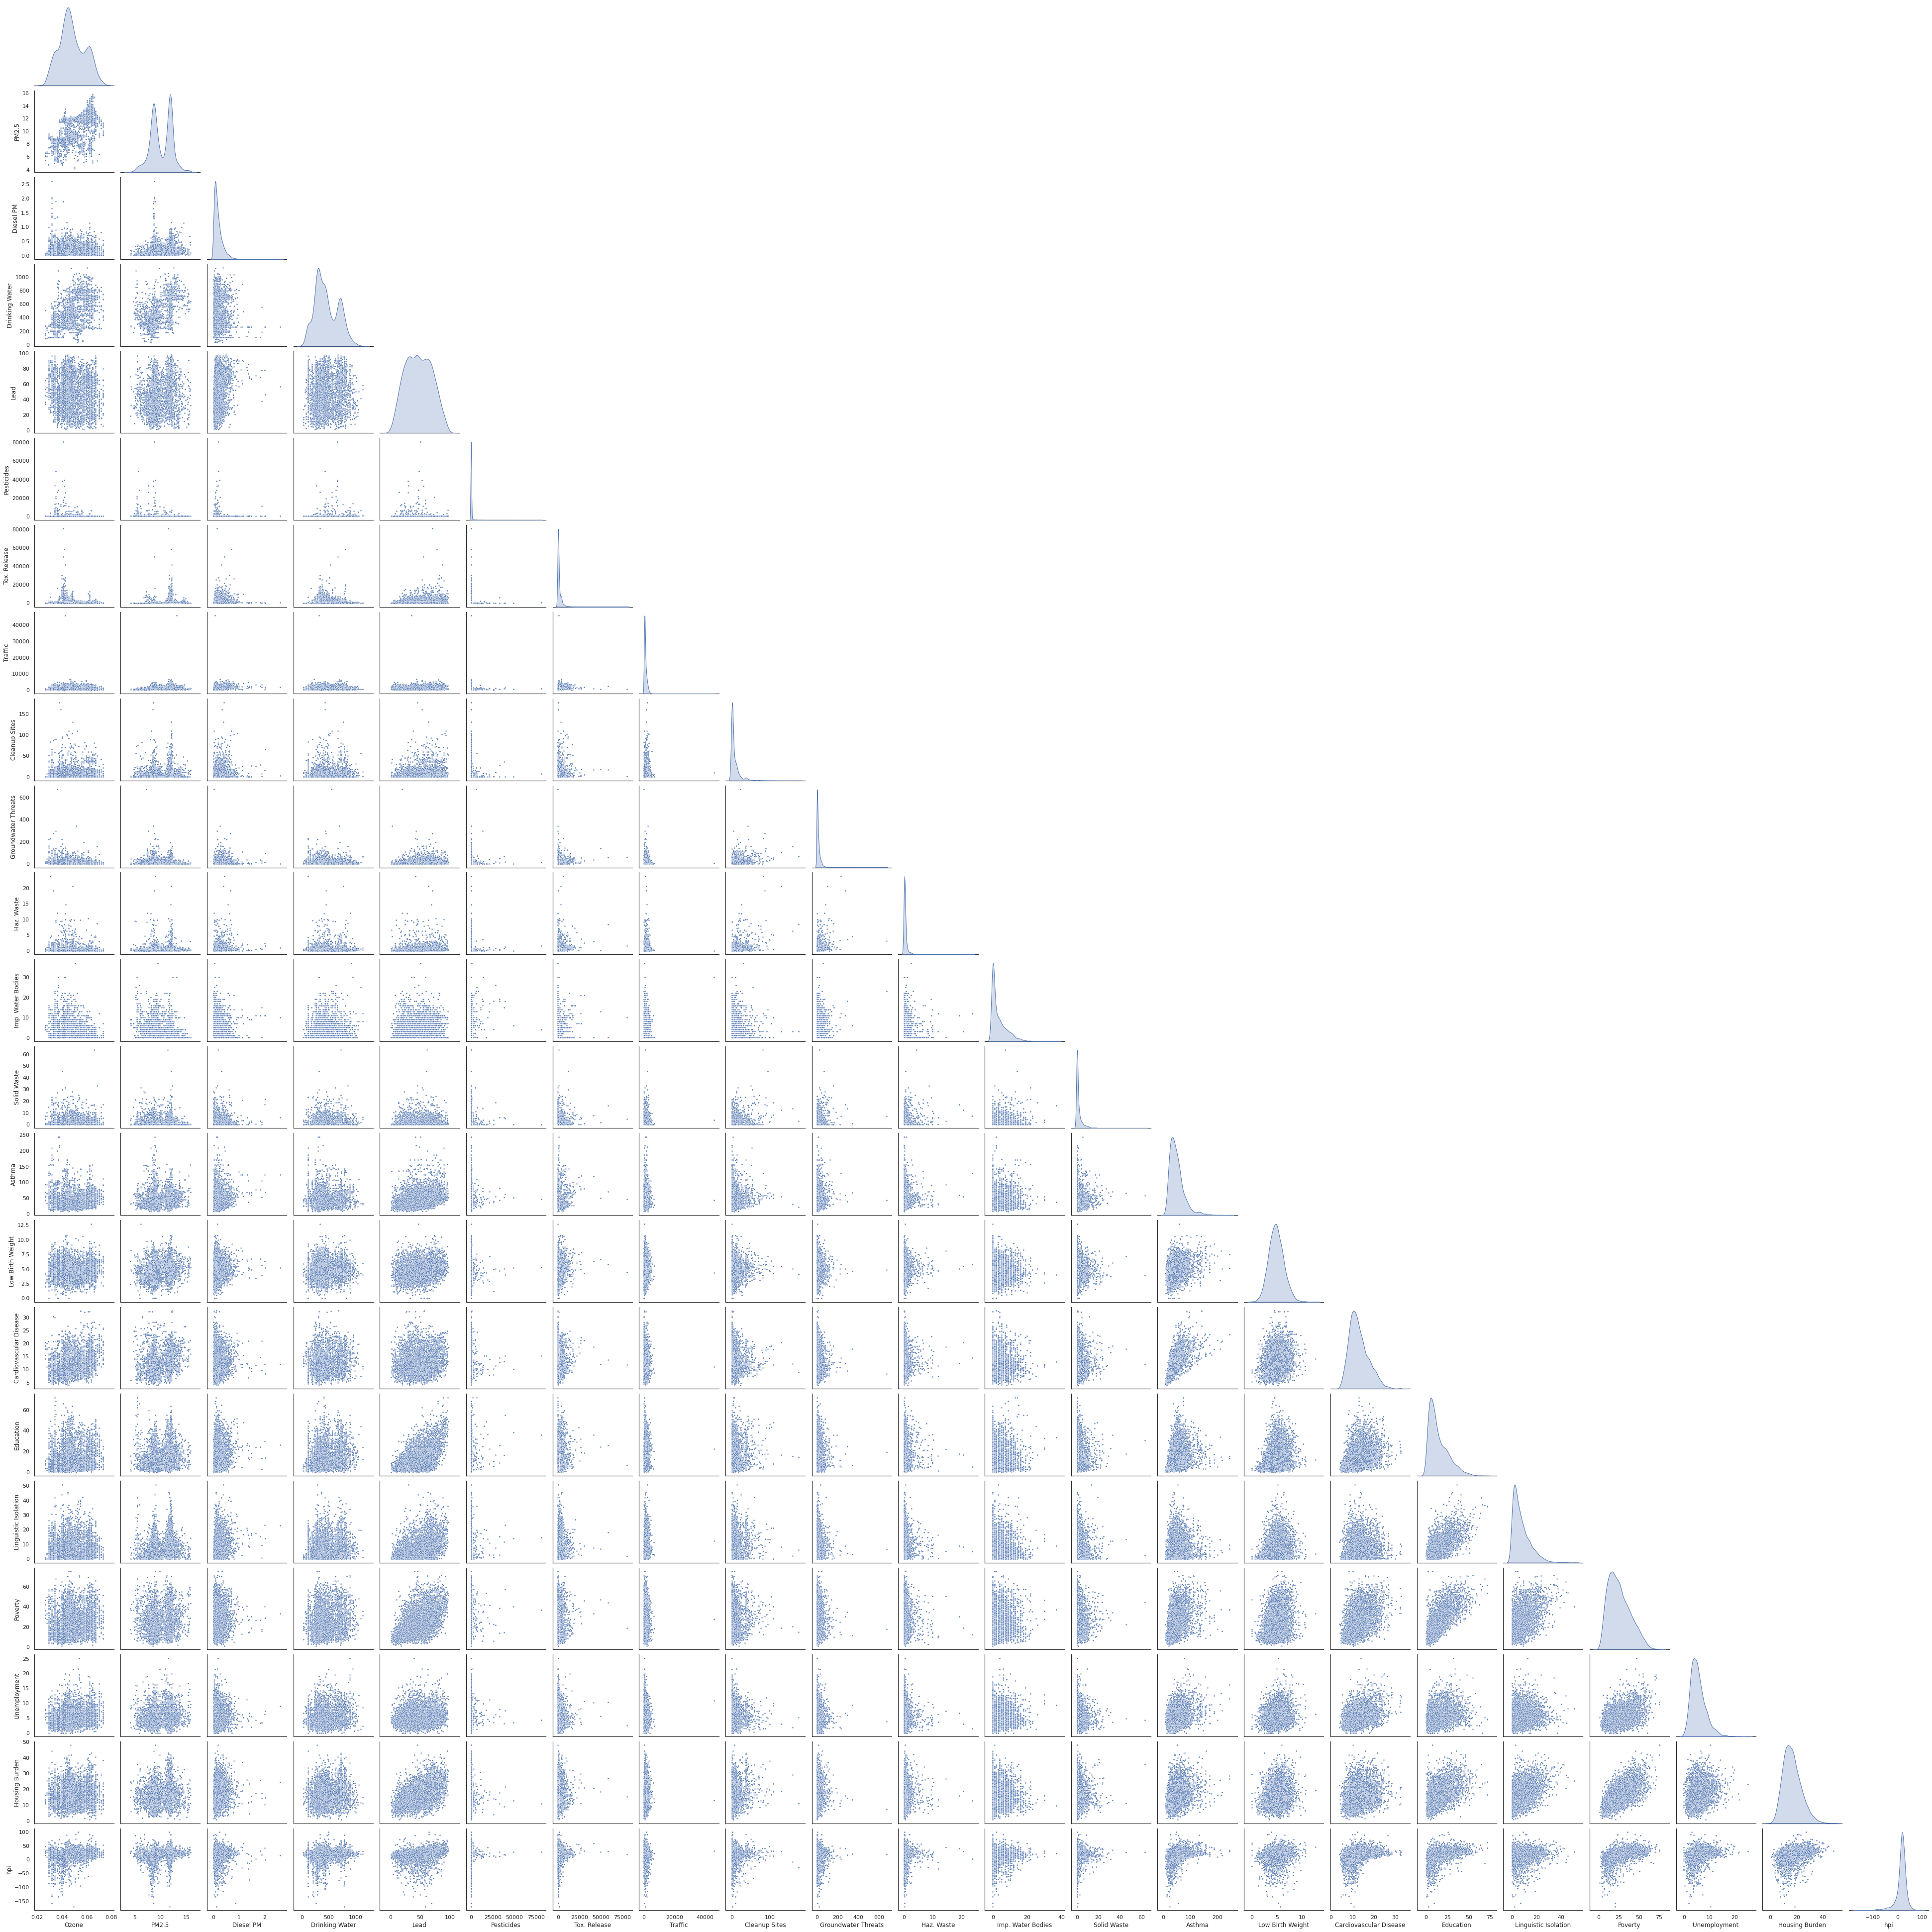

In [307]:
# use a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=dfall, markers=".", diag_kind='kde', corner=True)

The KDE plots above show that most of the variables are not normaly distributed. Furthermore, as the last row of the scatterplots shows. none of the independent variables displays a linear relationship with the dependent variable(hpi). Therefore a multivariate linear regression model will not be appropriate for explaining this relationship.

array([[<AxesSubplot:title={'center':'Ozone'}>,
        <AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Diesel PM'}>,
        <AxesSubplot:title={'center':'Drinking Water'}>,
        <AxesSubplot:title={'center':'Lead'}>],
       [<AxesSubplot:title={'center':'Pesticides'}>,
        <AxesSubplot:title={'center':'Tox. Release'}>,
        <AxesSubplot:title={'center':'Traffic'}>,
        <AxesSubplot:title={'center':'Cleanup Sites'}>,
        <AxesSubplot:title={'center':'Groundwater Threats'}>],
       [<AxesSubplot:title={'center':'Haz. Waste'}>,
        <AxesSubplot:title={'center':'Imp. Water Bodies'}>,
        <AxesSubplot:title={'center':'Solid Waste'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Low Birth Weight'}>],
       [<AxesSubplot:title={'center':'Cardiovascular Disease'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Linguistic Isolation'}>,
        <AxesS

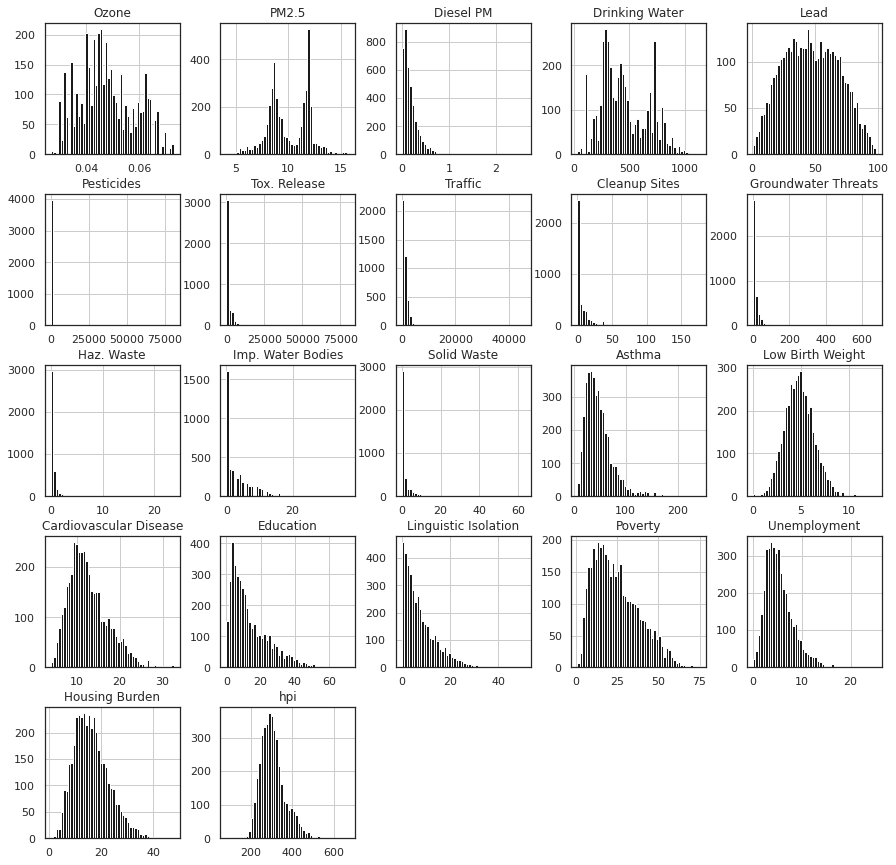

In [41]:
dfall.hist(bins=50, figsize=(15, 15),color='k')

<AxesSubplot:ylabel='Frequency'>

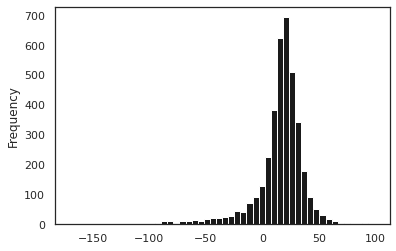

In [308]:
## plot histogram 
dfall['hpi'].plot.hist(bins=50 ,color='k') 



<AxesSubplot:ylabel='Frequency'>

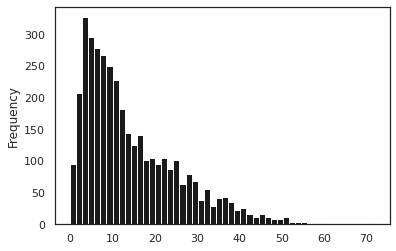

In [309]:
## plot histogram 
dfall['Education'].plot.hist(bins=50 ,color='k') 


<AxesSubplot:ylabel='Frequency'>

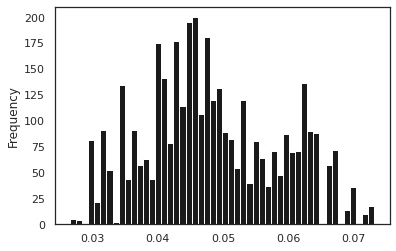

In [310]:
## plot histogram 
dfall['Ozone'].plot.hist(bins=50 ,color='k') 


<AxesSubplot:>

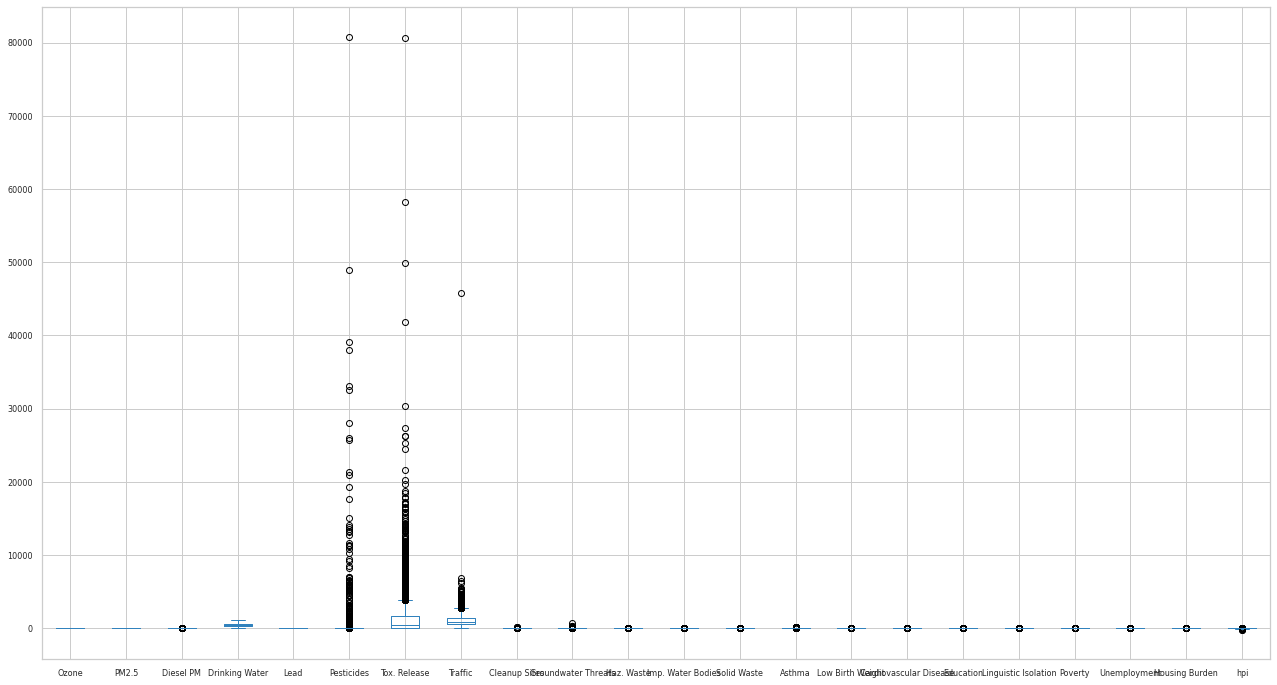

In [311]:
sns.set_style("whitegrid")
dfall.boxplot(
            figsize=(22,12),fontsize =8, color = "#3182bd")

#plt.savefig("boxplots.png", bbox_inches = 'tight',dpi=300)

The boxplots indicate the existence of outliers in all variables with a few of them recording extreme outliers: "Pesticides","Tox.Resease", "Trafic"

In [46]:
dfall.columns

Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi'],
      dtype='object')

In [47]:
boxplotlist =[ 'Ozone','PM2.5', 'Diesel PM', 'Drinking Water', 'Lead',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi']

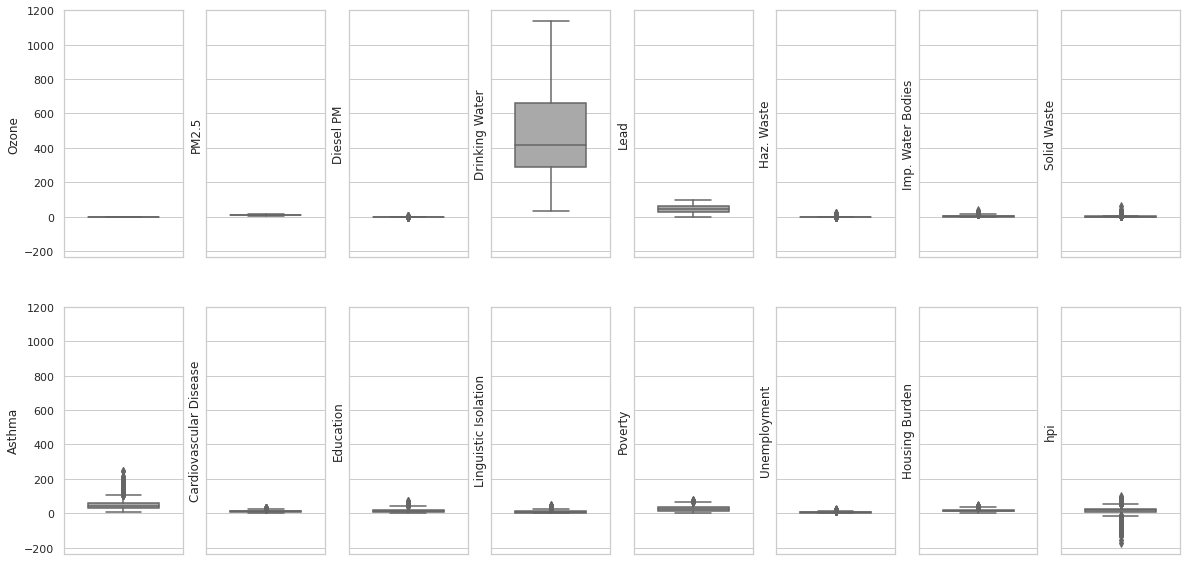

In [312]:
fig, ax = plt.subplots(2,8, figsize=(20, 10) ,sharey=True)
#move overall title up
#fig.subplots_adjust(top=.85)
#fig.suptitle('(A)Non-sequential removal')
#ax[0].set_title('Degree Centrality')
#ax[1].set_title('Betweeness Centrality')
#ax[2].set_title('Delta Centrality')

#specify axis labels
#for i in range(0,3):
   # ax[i].set(ylabel='Efficiency')
#ax[i].set(xlabel='Station removed')
ax = ax.flatten()

#ax[0].set(ylabel='Size of largest component')
for i in boxplotlist:
    sns.boxplot(y=i, data=dfall,width=0.6,ax=ax[boxplotlist.index(i)],color = "darkgrey")



In [46]:
#dftest = dfall.copy()

In [47]:
# dftest[log]

### 5.2 Data preparation

#### 5.2.1 train-test split

In [313]:
# split the data in training and testing set
train_x, test_x, train_y, test_y = train_test_split(dfall.drop(['hpi'], axis = 1), dfall.hpi, random_state=random_state)

In [314]:
# TRAIN TEST SPLIT FOR VALIDATION!

# create the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

print(X.shape)
print(y.shape)

# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)


#print out the size of the different datasets created
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3747, 21)
(3747,)
(2622, 21)
(562, 21)
(563, 21)


### !!! taking the log???????????????????????????/

#### 5.2.3. additional: check for multicolinearity

Text(0.5, 1.0, 'Correlation Matrix')

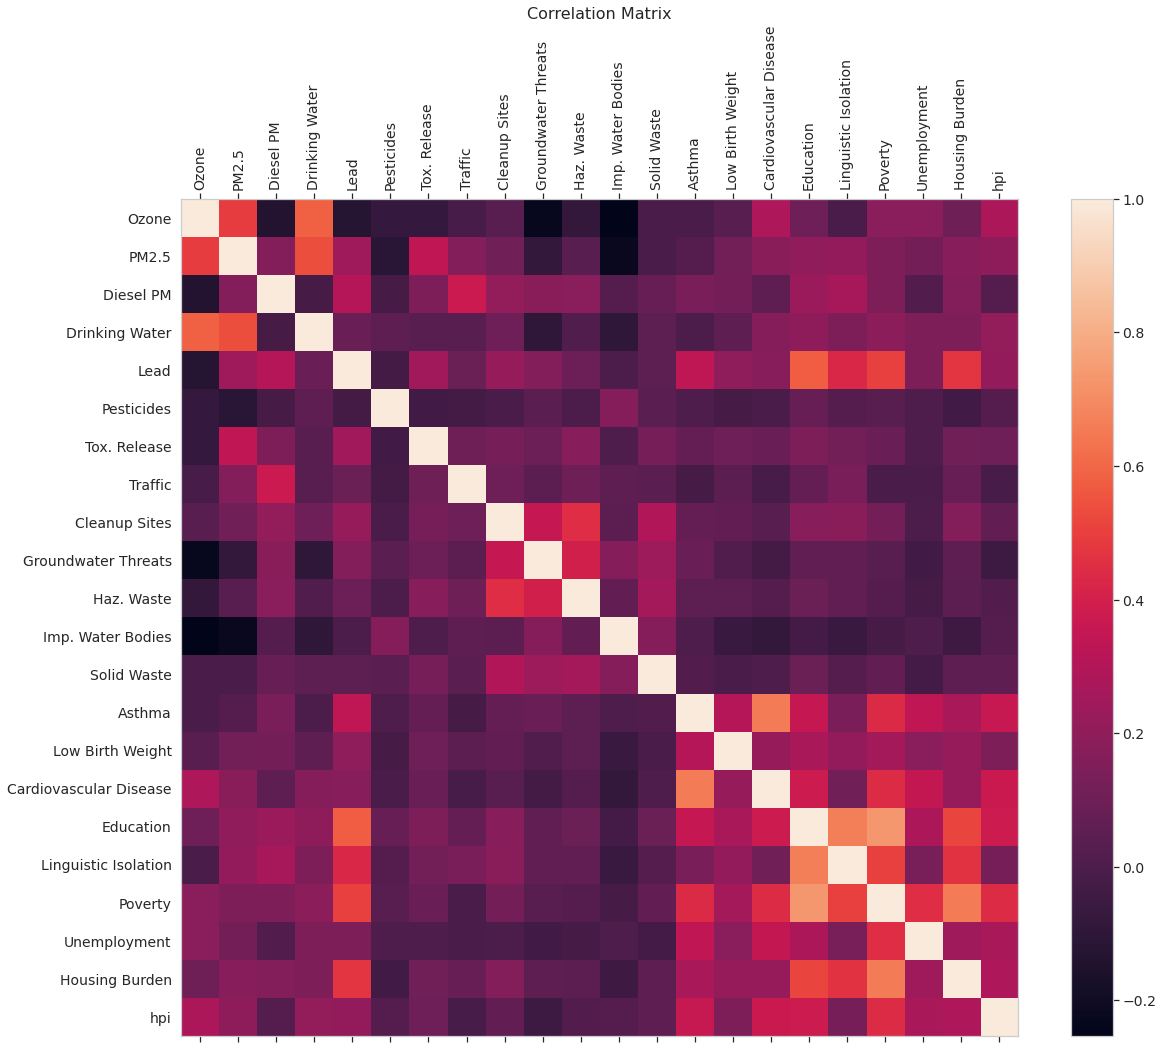

In [315]:
df = dfall
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [316]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [317]:
# using VIF on the bike_rental dataset

train_x_VIF = drop_column_using_vif_(train_x, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 3.556518578721884
The columns remaining after VIF selection are:
Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


NOTE: VIF drops NO variables!

### 5.3 In-depth Analysis

#### Linear regresssion (test) (ass residuals plot? or p values for stat signif)

In [318]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

Now that we've created our fit, it's time to look at the structure of the model and how well it fits the data.

There are a number of ways to do this. In the first instance, as with any linear regression model, we want to get a grip on the coefficients and intercept of the model. Helpfully, these two functions are built into the LinearRegression object. **Consult the documentation and see if you can find out how to extract these.**

In [319]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  -31.32357256959622
                       var                                     coef
0                    Ozone                                 396.4346
1                    PM2.5                                   0.4725
2                Diesel PM                                  -0.3479
3           Drinking Water                                   0.0022
4                     Lead                                  -0.0121
5               Pesticides                                   0.0001
6             Tox. Release                                   0.0004
7                  Traffic                                  -0.0006
8            Cleanup Sites                                   0.0206
9      Groundwater Threats                                  -0.0552
10              Haz. Waste                                   0.2477
11       Imp. Water Bodies                                   0.3642
12             Solid Waste                                   0.0523
13           

In [322]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.3208839933441475

In [323]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns] # select the VIF columns that the train date by using it as a selector

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.30459903794379817

<AxesSubplot:title={'center':'Modal Coefficients'}>

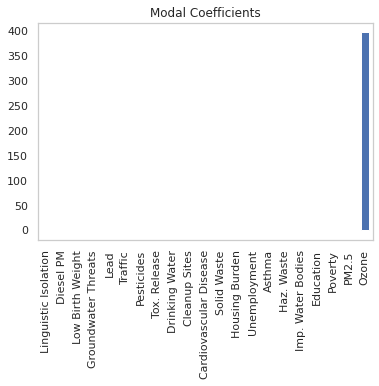

In [324]:
#checking the magnitude of coefficients

predictors = train_x_VIF.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### Lasso regression 

In [325]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True) # need to be normalised
# fit the model
lasso_model.fit(X=train_x, y=train_y) # dont need the VIF. lasso does it 

Lasso(max_iter=100000000.0, normalize=True)

In [326]:
lasso_model.score(X=train_x, y=train_y) # calculates the R sqr

0.0

The lasso regresso has a Rsquared of 0.14. 
This model performs poorly.

We can check out the coefficients using the following code.

In [327]:
# print(lasso_model.coef_)
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                       var                                     coef
0                    Ozone                                   0.0000
1                    PM2.5                                   0.0000
2                Diesel PM                                   0.0000
3           Drinking Water                                   0.0000
4                     Lead                                   0.0000
5               Pesticides                                   0.0000
6             Tox. Release                                   0.0000
7                  Traffic                                  -0.0000
8            Cleanup Sites                                   0.0000
9      Groundwater Threats                                  -0.0000
10              Haz. Waste                                   0.0000
11       Imp. Water Bodies                                   0.0000
12             Solid Waste                                   0.0000
13                  Asthma                      

We can apply the Lasso regression with a range of lambda parameters, and see how the coefficients change with the lambda value. The plot is called `LASSO Path`.

(-1.25, 4.25, -4.651509382213076, 6.411952014154245)

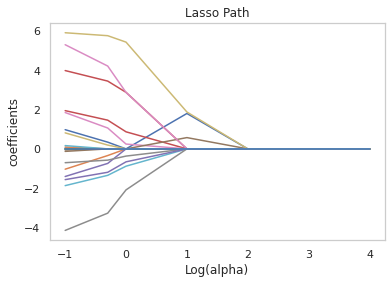

In [328]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [329]:
from sklearn.linear_model import LassoCV # dont need to worry about splitting in test and train data here
import time

start_time = time.time()
lasso_cv = LassoCV(cv=20, alphas=list_alphas).fit(train_x, train_y)
fit_time = time.time() - start_time

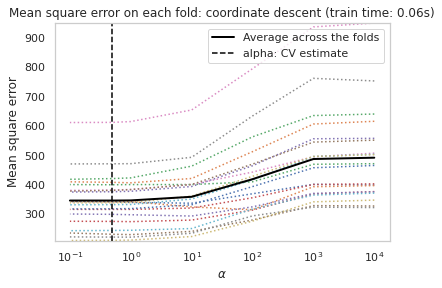

In [330]:
import matplotlib.pyplot as plt

ymin, ymax = np.min(lasso_cv.mse_path_), np.max(lasso_cv.mse_path_)
# lasso = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":")
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso_cv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

Print the **alphas_** values that have been compared.

In [331]:
print(lasso_cv.alphas_)

[1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 5.e-01 1.e-01]


In [332]:
print(lasso_cv.alpha_)

0.5


Rerun the lasso model using the optimal alpha value:

In [333]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=train_x, y=train_y)
print(lasso_model.score(train_x, train_y))

0.0


How does this model perform on the testing data?

In [334]:
print(lasso_model.score(test_x, test_y))

-7.128542981793551e-05


In [335]:
# print(lasso_model.coef_)
df_coef_lassoNEW = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                       var                                     coef
0                    Ozone                                   0.0000
1                    PM2.5                                   0.0000
2                Diesel PM                                   0.0000
3           Drinking Water                                   0.0000
4                     Lead                                   0.0000
5               Pesticides                                   0.0000
6             Tox. Release                                   0.0000
7                  Traffic                                  -0.0000
8            Cleanup Sites                                   0.0000
9      Groundwater Threats                                  -0.0000
10              Haz. Waste                                   0.0000
11       Imp. Water Bodies                                   0.0000
12             Solid Waste                                   0.0000
13                  Asthma                      

### NOTES:
Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero.[LINK](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

add interpretation 

add hedonic regression?

#### Random Forest

The random forest method[LINK] will be used in this section

The Random Forest Regresoor is an ensemble method, fitting multiple Decision Tree Classifiers on subsets of the dataset. The output is the average of these sub-trees. 


The advantages of this method are that:

    Easy to understand
    You can extract the structure by looking at individual trees
    Able to hand numerical and categorical data
    Reduces variance by combing diverse trees

The disadvantages:

    A large number of trees can make the algorithm too slow for real-time predictions in some cases


https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://mljar.com/blog/visualize-tree-from-random-forest/

In [336]:
from sklearn.ensemble import RandomForestRegressor

#use the RandomForestRegressor with default hyperparameters
reg_random_forest = RandomForestRegressor(random_state=random_state)

#make sure to use the right train test (since I want to do validation as well)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [337]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.9192236538398094
R2 on the testing data:
0.4074467791998394


NOTE: overfitting on the training data. Mediocre performance on the testing data

**HYPERPARAMETER TUNING**

We will compare two methods:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=None): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
Before proceding however we will first use the **validation curve** (also based on cross validation) to get an estimate of the right values for the hyperparameters tested for with the two validation methods.


In [338]:
%%time
n_estimators_range = [10,50,100,150,200,250]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

CPU times: user 57.7 s, sys: 37.6 ms, total: 57.7 s
Wall time: 57.7 s


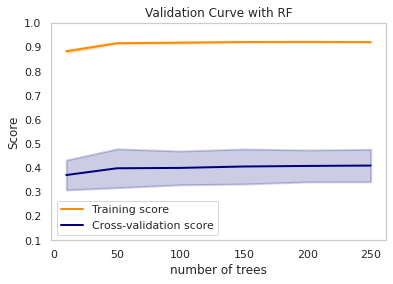

CPU times: user 146 ms, sys: 54 µs, total: 146 ms
Wall time: 140 ms


In [339]:
%%time

# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The plot above shows that  the training and development scores do not change significantly with the number of trees and the score seems to stabilise after the value of approximately 100 trees

In [340]:
%%time
max_depth_range= [5,10,13,15,18]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

CPU times: user 30.4 s, sys: 19.7 ms, total: 30.4 s
Wall time: 30.4 s


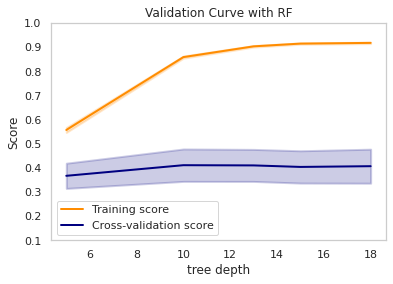

CPU times: user 156 ms, sys: 62 µs, total: 156 ms
Wall time: 151 ms


In [341]:
%%time

# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Tree depth seems to affect the score values more, with the training score to imporve when the tree is deeper as expcected. However the validation score seems to only slightly vary between the values of  10-18

In [342]:
# set values for the hyperparameters tuning
estimatorlist= [50,100,120,150,200,220]
depthlist= [8,10,13,15,18]

##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [343]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [344]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
             }

rf = RandomForestRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(rf, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 15, 'n_estimators': 200}
The best score is: 
0.5094258469058826
CPU times: user 1min 14s, sys: 9.21 ms, total: 1min 14s
Wall time: 1min 14s


Now a final model with the tuned hypermarameters can be created:

In [345]:
%%time
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

CPU times: user 3.41 s, sys: 0 ns, total: 3.41 s
Wall time: 3.41 s


RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [346]:
%%time
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9141213480852296
The score on the development data:
0.5094258469058826
CPU times: user 92.4 ms, sys: 9.93 ms, total: 102 ms
Wall time: 99.8 ms


The Random Forest Regressor Model tuned with Holdout Validation has (very) sligly improved the performance.

and also slightly reduced the difference between the sore on the training and **development** data


##### **Cross-validation**

Cross-validation is considered more robust. 


In [347]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [348]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 15, 'n_estimators': 200}
The best score is: 
0.44620855117208846
CPU times: user 5min 41s, sys: 157 ms, total: 5min 41s
Wall time: 5min 41s


In [349]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [350]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9141213480852296
The score on the development data:
0.5094258469058826


The Random Forest Regressor Model tuned with Cross Validation, returns slightly better results (higher R2 score on the developent data) and a smaller difference with the training data, compared to the holdout validation method. 

##### RF final estimate of performance 

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [351]:
rf_final.score(X_test, y_test)

0.4137421616576309

##### Indicative Tree Visualisation

Since Random forest is an essemble method, it does not really make sense to visualise the trees. However, visualising a few trees can give an indicative image and help at interpreting the results. 

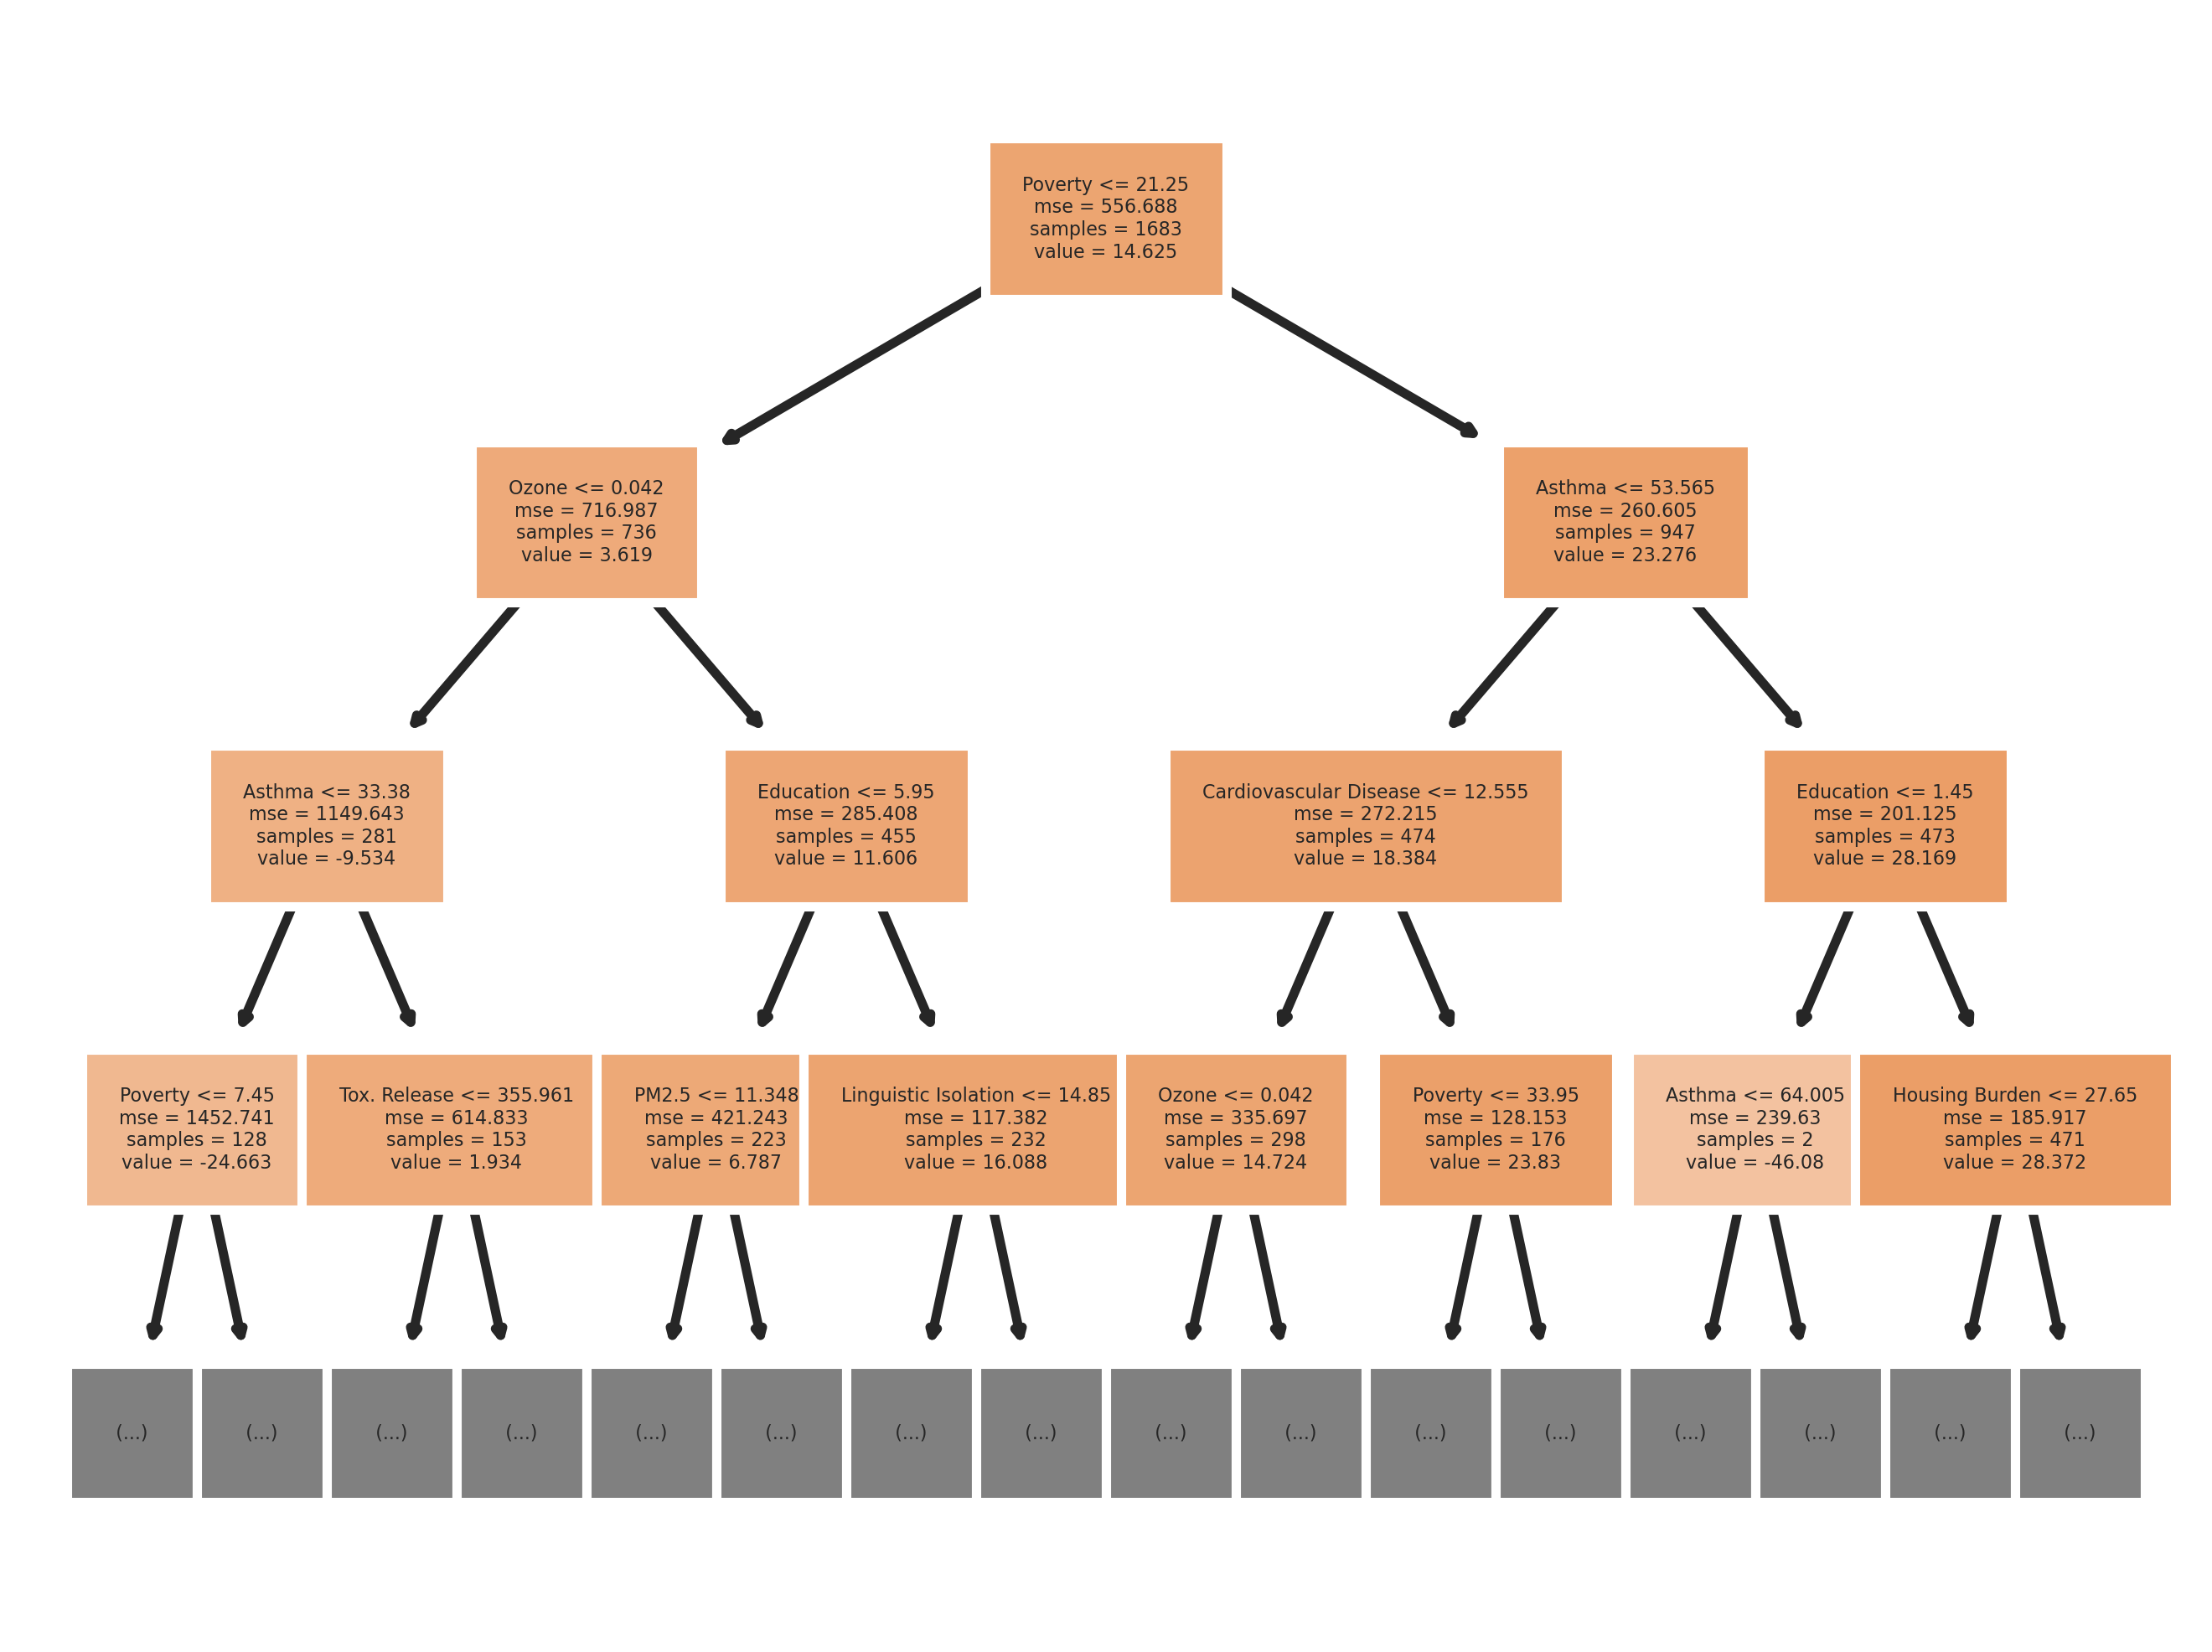

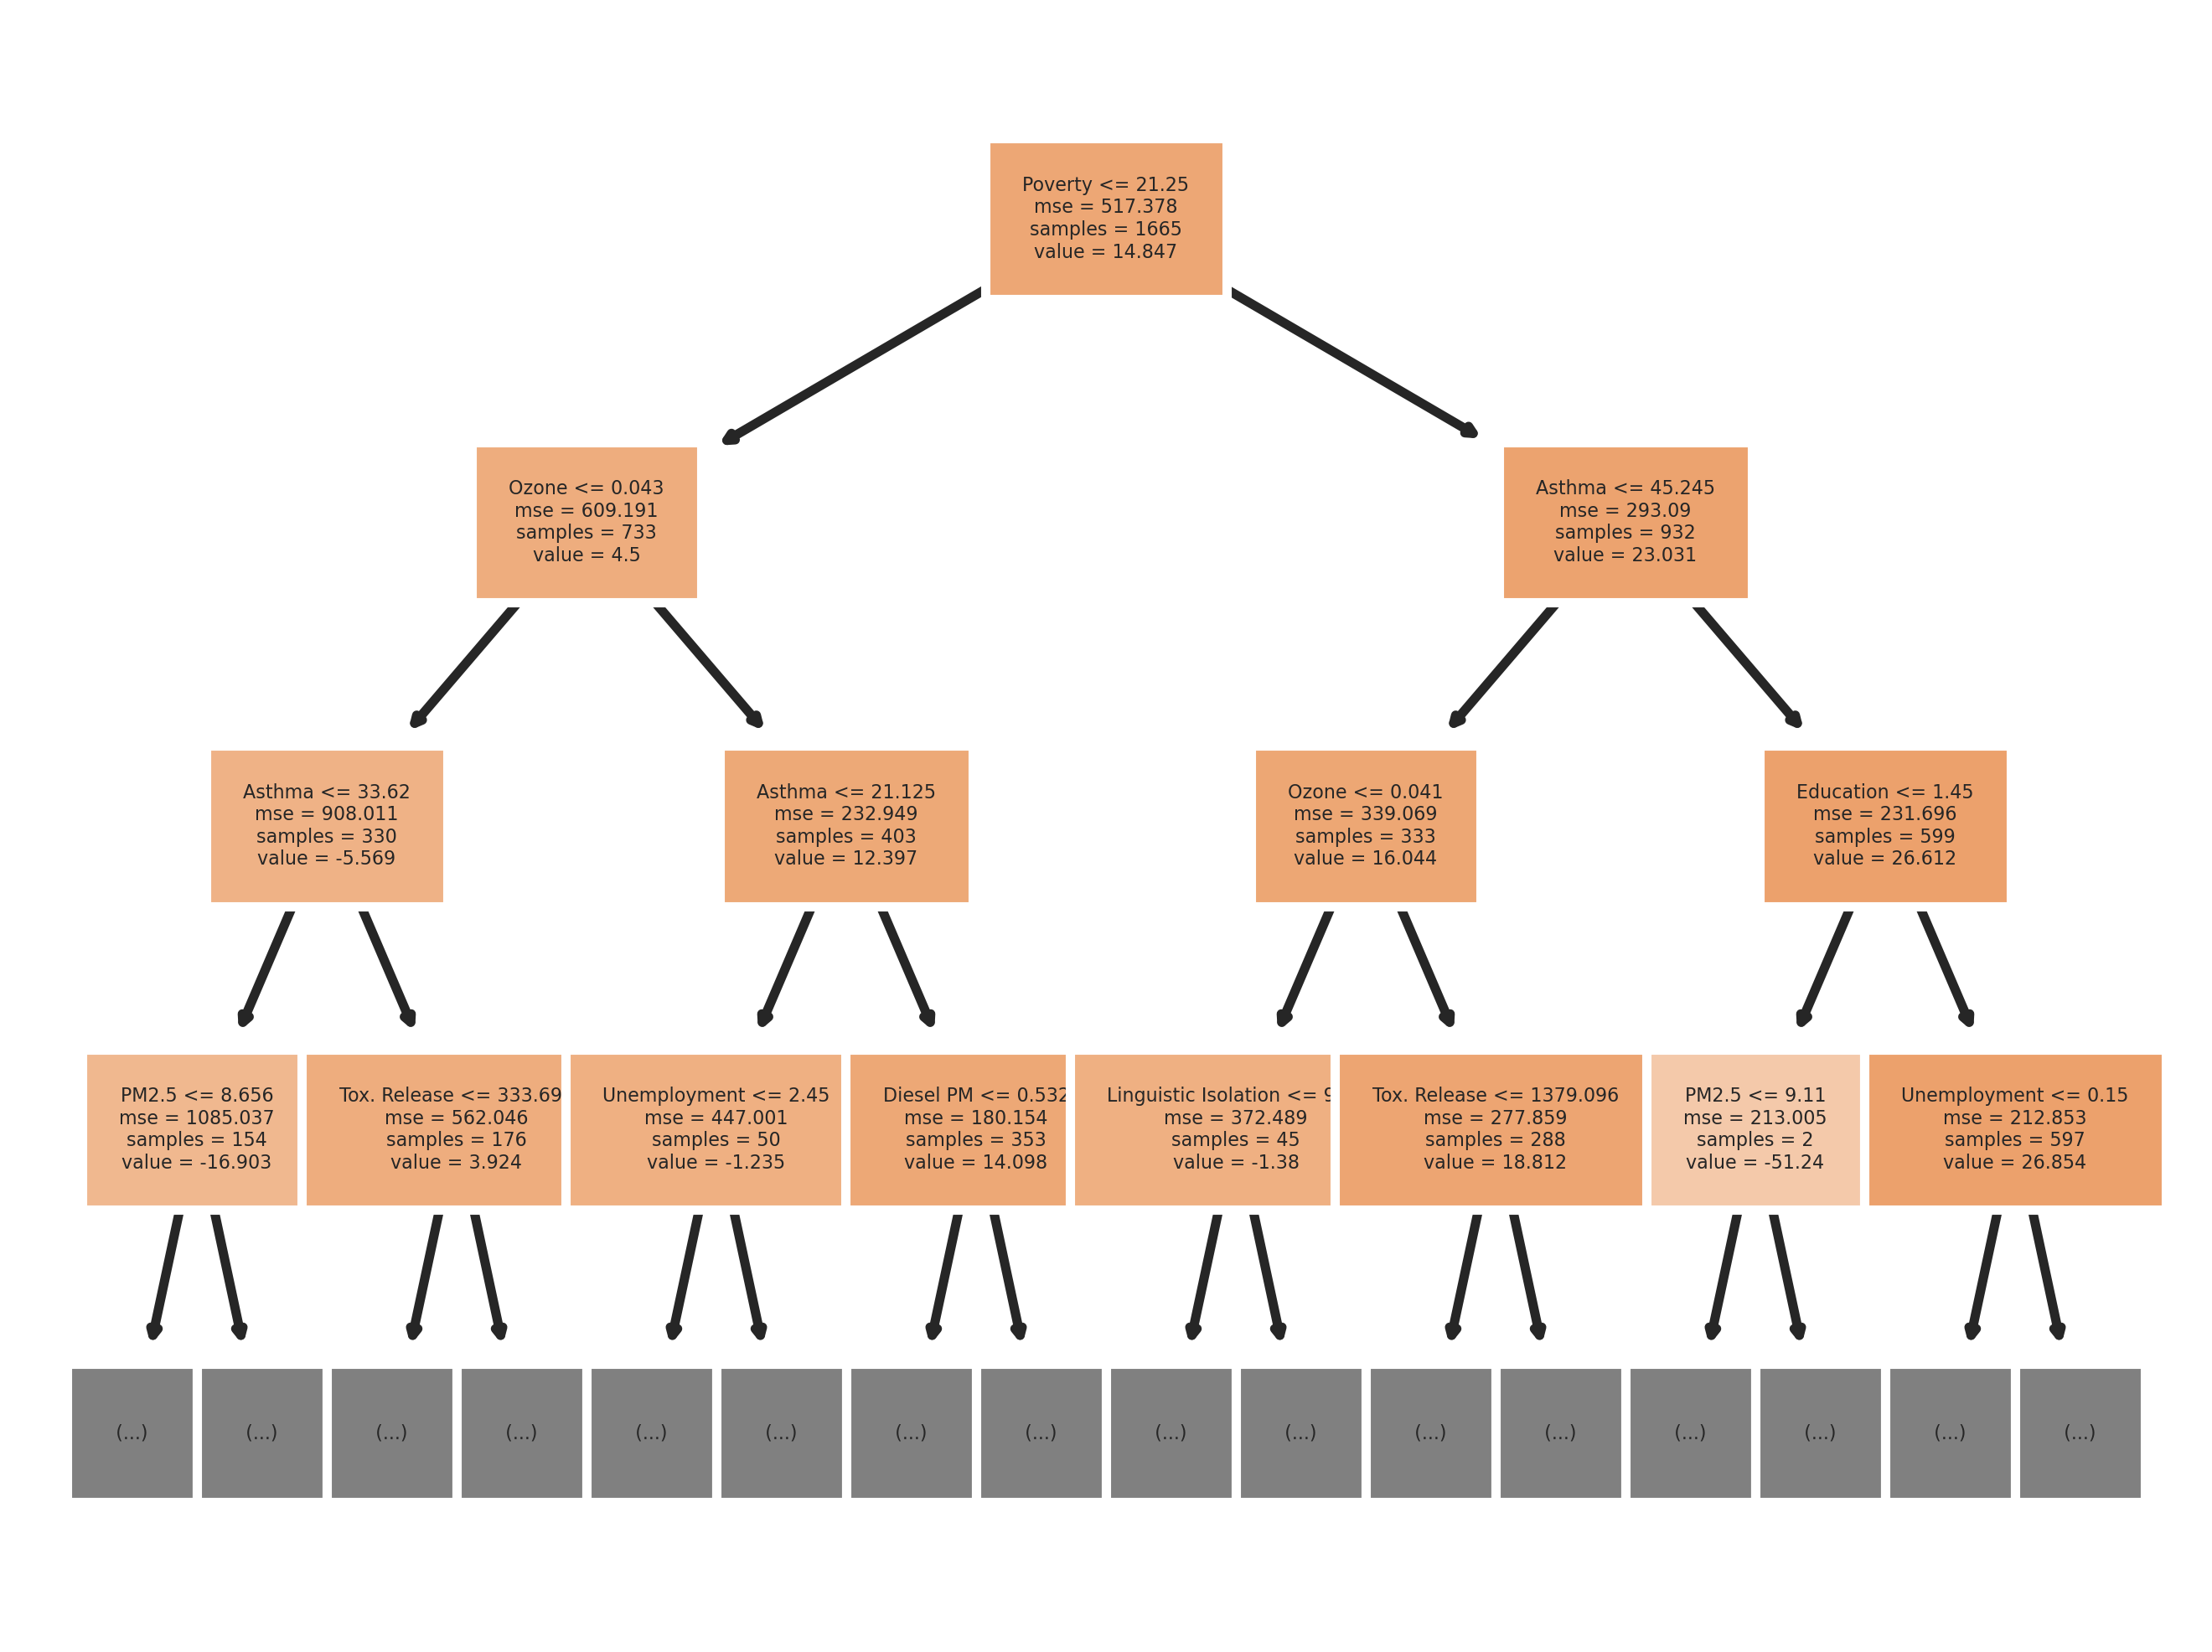

In [352]:
# code from https://github.com/UCL-DSS/random-forest-workshop/blob/main/Workshop.ipynb
#The best parameter value is: {'max_depth': 15, 'n_estimators': 200}


from sklearn import tree

import numpy as np
a = np.array(y_test.unique())
a = a.astype('<U10')
a

#visulise the first 2 trees
for x in range (0, 2):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=800)
    tree.plot_tree(rf_final.estimators_[x],max_depth=3, fontsize=2,
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True)

##### Interpretation: permutation feature importance

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [148]:
! pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=b237768cff7f37f584ff1fb72c365445ef22aac67c75078e0804c7d88c6de51a
  Stored in directory: /home/jovyan/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [353]:
%%time
import rfpimp
imp = rfpimp.importances(rf_final, X_test, y_test) # permutation
print(imp)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Ozone                                                    0.2241
Poverty                                                  0.1195
Tox. Release                                             0.1111
Asthma                                                   0.1087
Education                                                0.0373
Housing Burden                                           0.0302
PM2.5                                                    0.0218
Haz. Waste                                               0.0167
Drinking Water                                           0.0098
Lead                                                     0.0096
Linguistic Isolation                                     0.0038
Low Birth Weight                                         0.0037
Pesticides                                               0.0031
Imp. Water Bodies                       

Text(0.5, 1.0, 'Feature importances from the Random Forest Regressor')

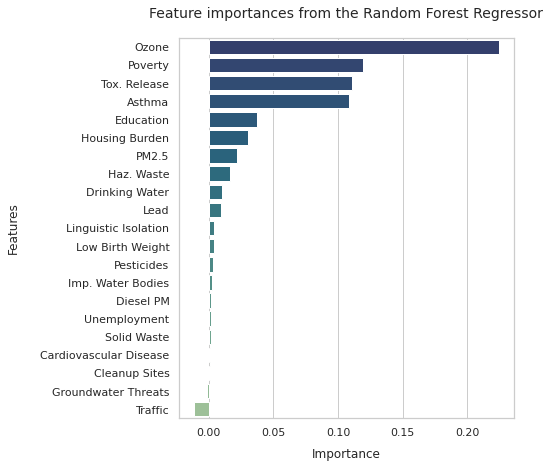

In [354]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=imp.index.values, 
                 #hue="room_type",
                  data=imp,
                  order = imp.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

### viz test
https://linuxtut.com/en/a135cc5a7cd1bbadfc2f/


In [355]:
# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval)
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(yval_array, yval_predict_array, label='validation set', color='blue', alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label='test set', color='tomato', alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax])
    plt.xlabel('actual values', fontsize=24)
    plt.ylabel('predicted values', fontsize=24)
    plt.title(f'{title}-Validation-Prediction Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.show()

valid_R2: 0.5094258469058826
test_R2: 0.4137421616576309


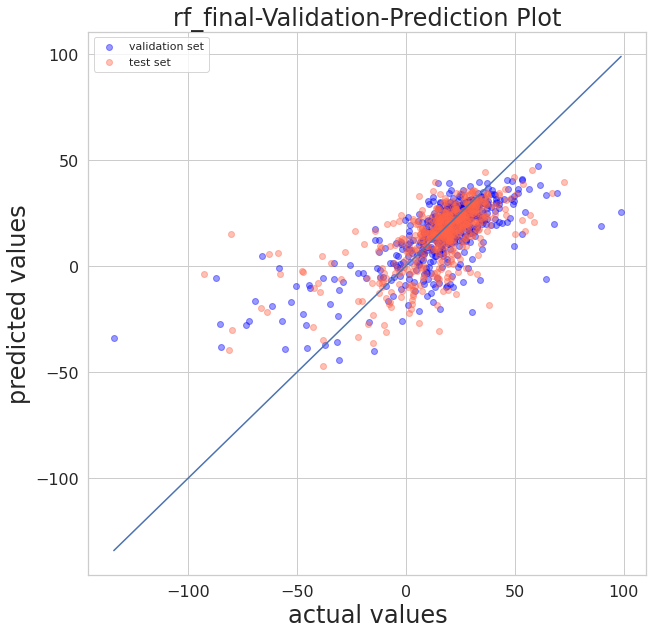

In [356]:
from sklearn.metrics import mean_squared_error

y_pred_val = rf_final.predict(X_val)
y_pred_test = rf_final.predict(X_test)
#print('='*20)
#print('RandomForestClassifier')
#print(f'valid_RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')
#print(f'test_RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'valid_R2: {rf_final.score(X_val, y_val)}') 
print(f'test_R2: {rf_final.score(X_test, y_test)}')
val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, 'rf_final')

#### GBDT and XGBoost

A GBDT (Gradient Boosting Decision Tree) model will be used and compared to the previous models. 

The main difference to The random forest, is that in this ensemble learning the models are trained sequentially using the results of previous models as an input to the next(by assigning lower weight to correctly predicted outcomes and higher weight to the wrongly predicted outcomes) [LINK](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

The [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) package will be used for this

In [357]:
# ! pip install XGBoost

In [358]:
import xgboost as xgb

#create the XGB boost model with default hyperparameters
xgb_model = xgb.XGBRegressor(random_state = random_state)

#fit the model the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Compare the perfomance of the XGBmodel on the training and testing set:

In [359]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.992129861733099
R2 on the testing data:
0.3730544820468714


The XGB model seems to perform better than the previous models on the testing set, but this uncalibrated model does not perform well on the testing data

**HYPERPARAMETER TUNING**

Similarly to the above, two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However it is also slowing down the training process. 
        
      
* ```max_depth``` (default=6): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However allowing maximum depth might result in overfitting. 
   
* ```learning_rate``` (default=0.3): 

* ```colsample_bytree``` (default=1): 


Before proceding however we will first use lineplots to get an estimate of the right values for the hyperparameters tested for with the two validation methods.
The code below is based on this [article](https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92)

NOTE: cross- validation is more robust, but is more computational intensive

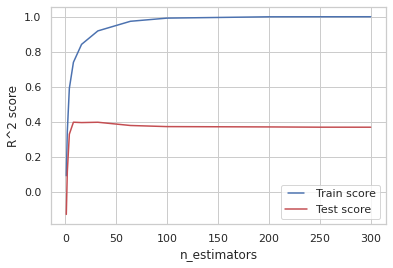

In [360]:

#Code adapted from: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 250,300]
train_results = []
test_results = []

for estimator in n_estimators:
    xr = xgb.XGBRegressor(random_state=random_state, n_estimators=estimator, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train score')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('n_estimators')
plt.show()

The plot above shows that the R2 score stabilises between approximatelly 150 and 200 estimators

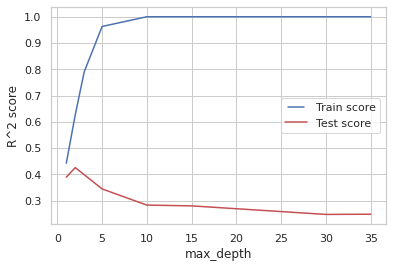

In [361]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

max_depths = [1,2,3,5,10,15,30,35]
train_results = []
test_results = []

for max_depth in max_depths:
    xr = xgb.XGBRegressor(random_state=random_state, max_depth=max_depth, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('max_depth')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a max depth value of 3-5 trees and for the training data the R2 scores seem to stabilise after about the max depth value of 10.

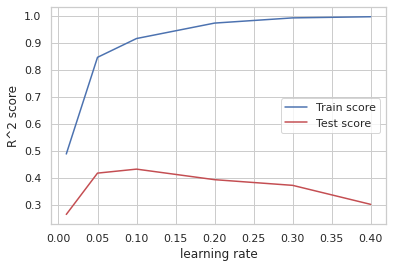

In [362]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
learning_rates = [0.01,0.05,0.1,0.2,0.3,0.4]

train_results = []
test_results = []

for learning_rate in learning_rates:
    xr = xgb.XGBRegressor(random_state=random_state, learning_rate=learning_rate, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(learning_rates, train_results, 'b', label='Train score')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('learning rate')
plt.show()

The above plot indicates that the best R2 scores for the testing data occur at a learning rate of around 0.05 and for the training data the R2 scores seem to continuously increase

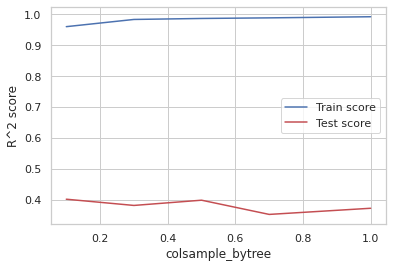

In [363]:
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

#max_depths = int(np.linspace(1, 32, 32, endpoint=True))
colsamples = [0.1,0.3,0.5,0.7,1]

train_results = []
test_results = []

for colsample in colsamples:
    xr = xgb.XGBRegressor(random_state=random_state, colsample_bytree=colsample, n_jobs=-1)
    xr.fit(X_train, y_train)   
    
    score_train = xr.score(X=X_train, y=y_train)
    train_results.append(score_train)
    
    score_test = xr.score(X=X_test, y=y_test)
    test_results.append(score_test)
    

from matplotlib.legend_handler import HandlerLine2D
lcine1, = plt.plot(colsamples, train_results, 'b', label='Train score')
line2, = plt.plot(colsamples, test_results, 'r', label='Test score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R^2 score')
plt.xlabel('colsample_bytree')
plt.show()

In [364]:
# set values for the hyperparameters
estimatorlist= [10,15,20,100,200,250]
depthlist= [2,5,10,12]
learningratelist = [0.01, 0.05, 0.1]
colsampletreelist = [0.5, 0.7]


##### **Holdout validation**

Holdout validation will be used here, by specifing the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of of indices. 

In [365]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [366]:

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }

xr = xgb.XGBRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xr, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
The best score is: 
0.5472373134613915


Now a final model with the tuned hypermarameters can be created:W

In [367]:

xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)
xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [368]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9141213480852296
The score on the development data:
0.5094258469058826


##### **Cross-validation**


In [369]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [370]:
from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators':estimatorlist
              ,'max_depth':depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }
xgb_model = xgb.XGBRegressor(random_state = random_state)

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(xgb_model, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 250}
The best score is: 
0.48529902591304663


The two validation methods, pick the same values for all hyperparameters except n_estimators(150 in cross-validation, 200 in holdout validation). The best score result is also almost exactly the same

We create the final model with the tuned hypermarameters:

In [371]:
xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)

xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [372]:
print('The score on the training data:')
print(xgb_final.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final.score(X_val, y_val))

The score on the training data:
0.9990753301785176
The score on the development data:
0.5222014203507592


Lets also plot the **validation curve**(also based on cross validation) for each parameter 

In [169]:
n_estimators_range = [10,20,30,40,50,70,100,150,200,250]

#n_estimators_range = estimatorlist
train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

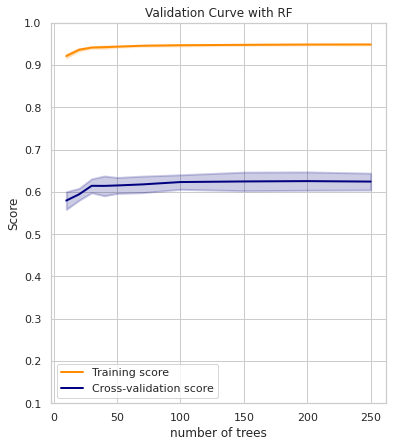

In [170]:
plt.figure(figsize=(6, 7))
# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [171]:
max_depth_range= depthlist

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

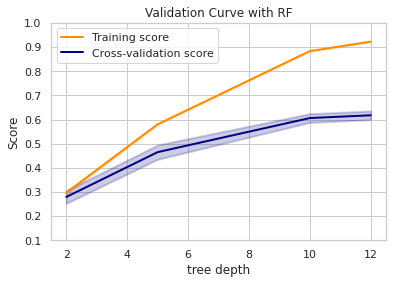

In [172]:
# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

##### **XGB final estimate of performance**

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [373]:
xgb_final.score(X_test, y_test)

0.501484141478354

## Model comparison

Lets compare the performance of the models

In [375]:

# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'GBDT']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final, xgb_final]

dict_models = dict()

# Element of dict_models: {'LR_VIF': [train_R2, test_R2]}

# Example
# data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data, orient='index')
#        0  1  2  3
# row_1  3  2  1  0
# row_2  a  b  c  d

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'LR_LASSO':
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models
# you can then export df_models as a csv file and use it in MS Excel or Word

R2_train_data  \
LR_VIF                                     0.3209   
LR_LASSO                                   0.0000   
RF                                         0.9141   
GBDT                                       0.9991   

                                     R2_test_data  \
LR_VIF                                     0.3046   
LR_LASSO                                  -0.0001   
RF                                         0.4137   
GBDT                                       0.5015   

                                          R2_diff  
LR_VIF                                     0.0163  
LR_LASSO                                   0.0001  
RF                                         0.5004  
GBDT                                       0.4976

interpreation of model comparison(in results?)

GBDT has higher R2 score on both training and testing data, indicating that this is the best performing model.  
However both GBDT and RF have a rather big r2 difference between the training and testing data indicating bias and overfitting.  The RF has a somewhat smaller R2 difference between the train and testig data indicating that this model is less subject to variance

##### **Interpretation: permutation feature importance**

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [376]:
#import rfpimp
impx = rfpimp.importances(xgb_final, X_test, y_test) # permutation
print(impx)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Ozone                                                    0.1151
Tox. Release                                             0.0885
Poverty                                                  0.0783
PM2.5                                                    0.0706
Education                                                0.0699
Asthma                                                   0.0452
Housing Burden                                           0.0287
Linguistic Isolation                                     0.0207
Lead                                                     0.0195
Diesel PM                                                0.0193
Cardiovascular Disease                                   0.0179
Drinking Water                                           0.0175
Imp. Water Bodies                                        0.0154
Pesticides                              

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

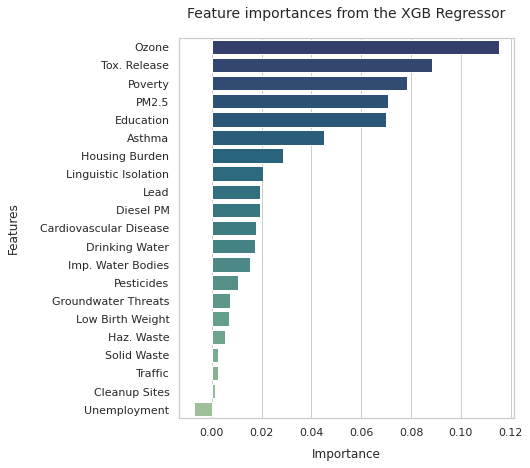

In [377]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=impx.index.values, 
                 #hue="room_type",
                  data=impx,
                  order = impx.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

add the two plots next to each other!

## PCA

This section will test whether using Principle component Analyis(PCA) will improve the prediction results of the best performing model(RF). This dimensionality reduction method will create a set of Prinical Components(new features) from out independent variables based on the highest variance. +++++

In [378]:
# create again the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

# create a list with the names of independent variables
list_var_X = dfall.columns.tolist()
list_var_X.remove('hpi')


Before proceeding, the data needs scaling so that no feature dominates the results.+++

In [379]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(X)

In [380]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state)

# fit the components
X_new_components = pca.fit_transform(Xscaled)

In [381]:
print(list_var_X)
print(len(list_var_X))

['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']
21


Below we can print the makeup of each component. Each component is a linear combination of the previous independent variables.

In [382]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

Ozone  \
0                                    0.1089   
1                                   -0.4235   
2                                    0.3342   
3                                   -0.2138   
4                                    0.0873   
5                                    0.0241   
6                                   -0.1632   
7                                   -0.0227   
8                                   -0.0197   
9                                    0.0387   
10                                  -0.0473   
11                                   0.0507   
12                                   0.0583   
13                                   0.0248   
14                                  -0.0781   
15                                  -0.2070   
16                                  -0.4178   
17                                  -0.0867   
18                                   0.3878   
19                                   0.4730   
20                                   0.0106   

                                      PM2.5  \
0                                    0.2005   
1                                   -0.2183   
2                                    0.4619   
3                                    0.0959   
4                                   -0.1116   
5                                    0.0631   
6                                    0.2237   
7                                    0.0005   
8                                    0.0648   
9                                   -0.1197   
10                                  -0.0970   
11                                  -0.1292   
12                                  -0.0373   
13                                   0.0235   
14                                   0.0263   
15                                   0.0371   
16                                   0.0673   
17                                  -0.6354   
18                                  -0.0515   
19                                  -0.4043   
20                                   0.0030   

                                  Diesel PM  \
0                                    0.1704   
1                                    0.2472   
2                                    0.1230   
3                                    0.2695   
4                                   -0.2537   
5                                    0.3000   
6                                   -0.2357   
7                                    0.0567   
8                                    0.1639   
9                                    0.1054   
10                                  -0.0311   
11                                  -0.3810   
12                                  -0.3383   
13                                  -0.2134   
14                                  -0.3940   
15                                  -0.3017   
16                                  -0.0500   
17                                   0.1219   
18                                   0.0111   
19                                   0.0305   
20                                   0.0173   

                             Drinking Water  \
0                                    0.1608   
1                                   -0.2840   
2                                    0.3940   
3                                   -0.1376   
4                                    0.2377   
5                                    0.1469   
6                                    0.0128   
7                                    0.0507   
8                                   -0.0062   
9                                   -0.1144   
10                                  -0.2659   
11                                  -0.1070   
12                                  -0.0245   
13                                   0.0378   
14                                  -0.0653   
15                                   0.2064   
16                                   0.3776   
17                                   0.5774   
18                                  -0.1

or visualise it as a heatmap

<AxesSubplot:>

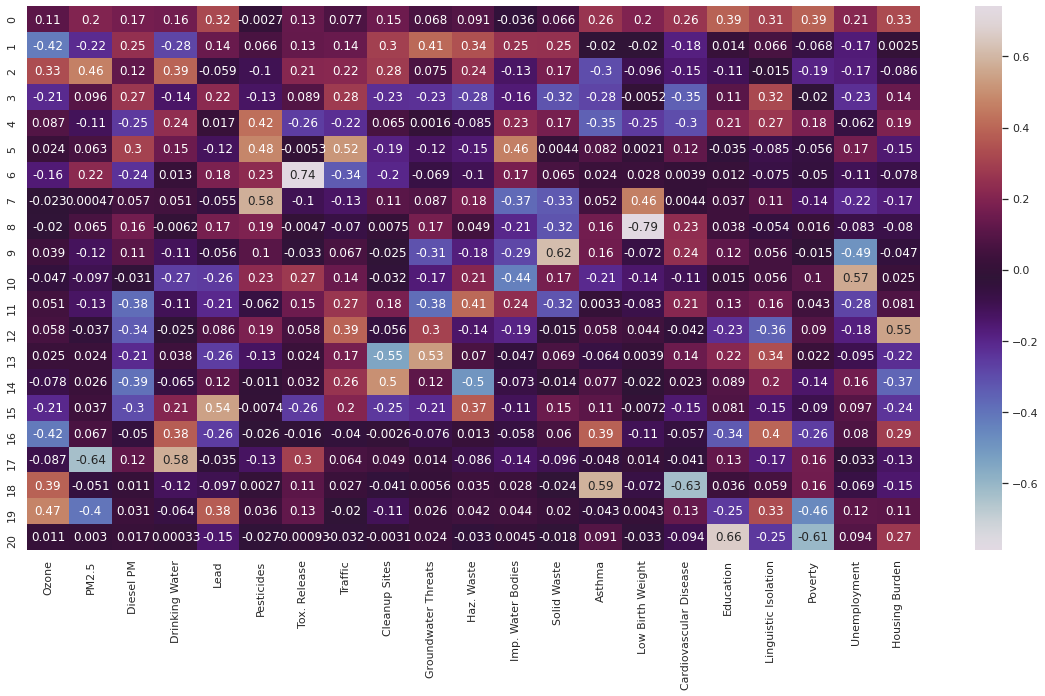

In [383]:
map = pd.DataFrame(pca.components_,columns=df_PrincipleComp.columns )
plt.figure(figsize=(20,10))
sns.heatmap(map,cmap='twilight',annot=True)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.[LINK](https://datascienceplus.com/principal-component-analysis-pca-with-python/)

We can print the proportion of the variance explained by each component:

In [384]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.2119202  0.11655452 0.09152385 0.070772   0.06063127 0.05285207
 0.04761649 0.04233707 0.03890532 0.03636128 0.03295487 0.02950604
 0.02783876 0.02726167 0.02456951 0.02278    0.01824399 0.01625438
 0.01204366 0.01066833 0.00840472]


You can get the eigen values of the PCA. The ```explained_variance_``` gives the actual eigen values.

In [385]:
# explained variance is the eigenvalue
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.45151213 2.44829826 1.92251393 1.48660883 1.27359656 1.11018974
 1.00021318 0.8893159  0.81722976 0.76379068 0.69223706 0.61979221
 0.58476998 0.57264792 0.51609747 0.47850762 0.38322611 0.34143312
 0.25298443 0.22409477 0.1765463 ]


One of the use of PCA is to visualise high-dimensional data. Here we can visualise the first two components, using the HPI as the colour.

Text(0, 0.5, 'PC2')

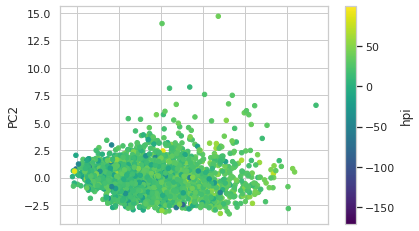

In [386]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the y variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(hpi = df.hpi)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "hpi", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [387]:
# as PC1 increases MEDV decreases
# as PC2 increases price increases

# this is one way to 'validate' the PCA results and interpret them 

# massive overlap!

try this plot


https://datascienceplus.com/principal-component-analysis-pca-with-python/

https://plotly.com/python/pca-visualization/

https://www.reneshbedre.com/blog/principal-component-analysis.html

### Selecting the number of components

There are different methods for selecting the number of PCA components. 
1.  2 or 3 PCs for visualisation
2.  PC with eigenvalues > 1
3.  Scree plot 

While using 2 or 3 components will allow better visualisation, we will check the components with Eigenvalue larger than 1 and the Scree plot.


In [388]:
count=0
for i in ((pca.explained_variance_)>1).tolist():
    if i==True:
        count+=1
print(f'The PC with Eigenvalue larger that 1 are: {count}')
    

The PC with Eigenvalue larger that 1 are: 7


<AxesSubplot:xlabel='PC'>

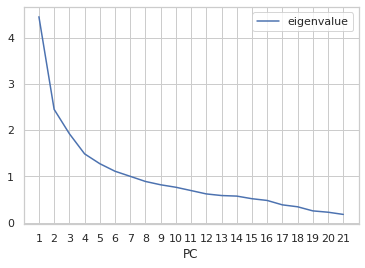

In [389]:
df1 = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df1.plot.line(x = 'PC', y = 'eigenvalue', xticks=df1.PC.values.tolist())

The plot above does no indicate one definite point as a transition point from a steep change to a gradual flattening. However we could argue that the right values is 3-6 components: the plot decreases quickly before 3 and starts to flatten out after 6.

We can therefore go for the two ends PC=3 or PC=7


### data preparation 

In [390]:
# create a new X dataset including three PCs (subset with the first three principal components)

X_three_pc = X_new_components[:,[0,1,2]]
X_seven_pc =  X_new_components[:,[0,1,2,3,4,5,6]]

In [391]:
#X_PCA = X_three_pc
X_PCA = X_seven_pc

## Random Forest after PCA

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://mljar.com/blog/visualize-tree-from-random-forest/

In this section, we will use the random forest method for this dataset.

In [392]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.3, random_state=random_state)
X_val_PCA, X_test_PCA, y_val_PCA, y_test_PCA = train_test_split(X_test_PCA, y_test_PCA, test_size=0.5, random_state=random_state)

In [393]:
from sklearn.ensemble import RandomForestRegressor
RF_PCA = RandomForestRegressor(random_state=random_state)
RF_PCA.fit(X_train_PCA, y_train_PCA)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [394]:
print("R2 on the training data:")
print(RF_PCA.score(X=X_train_PCA, y=y_train_PCA))
print("R2 on the testing data:")
print(RF_PCA.score(X= X_test_PCA, y= y_test_PCA))

R2 on the training data:
0.9047208450230365
R2 on the testing data:
0.28166478580528764


much worse performance on the testing data, overfitting. 

NOTE:
results with PC=3:

R2 on the training data:
0.8790137406428171
R2 on the testing data:
0.13102796683521079

##### **Cross-validation**


In [395]:
X_train_PCA = pd.DataFrame(X_train_PCA)
X_val_PCA =pd.DataFrame(X_val_PCA)
y_train_PCA =pd.DataFrame(y_train_PCA)
y_val_PCA= pd.DataFrame(y_val_PCA)

In [396]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val_PCA = pd.concat([X_train_PCA, X_val_PCA])
y_train_val_PCA = pd.concat([y_train_PCA, y_val_PCA])

In [397]:
# set values for the hyperparameters
estimatorlist= [150,200,220]
depthlist= [5,8,10]

In [398]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val_PCA, y_train_val_PCA.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 8, 'n_estimators': 220}
The best score is: 
0.3106462659790291
CPU times: user 46 s, sys: 29.9 ms, total: 46 s
Wall time: 46.1 s


In [399]:
rf_PCA_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_PCA_final.fit(X_train_PCA, y_train_PCA.values.ravel())

RandomForestRegressor(max_depth=8, n_estimators=220, random_state=42)

In [400]:
print('The score on the training data:')
print(rf_PCA_final.score(X_train_PCA, y_train_PCA))
print('The score on the development data:')
print(rf_PCA_final.score(X_val_PCA, y_val_PCA))

The score on the training data:
0.6767109788232342
The score on the development data:
0.2995785080653499


##### RF_PCA final estimate of performance 

Using the test set(that has not been used at any stage during the model training andn validation process) the final estimate of the RF model can be reported. 

In [401]:
rf_PCA_final.score(X_test_PCA, y_test_PCA)

0.3008357457892087

previous results

0.16709585170935193

## Model comparison

In [402]:
%%time
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'RF', 'XGB','RF_PCA']
# use the models from above
list_reg_models = [lr, lasso_model, rf_final, xgb_final, rf_PCA_final]

dict_models = dict()



for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'LR_LASSO':
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]
    elif name == 'RF_PCA':
        dict_models[name] = [model.score(X_train_PCA, y_train_PCA), model.score(X_test_PCA, y_test_PCA), model.score(X_train_PCA, y_train_PCA) - model.score(X_test_PCA, y_test_PCA)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models_final = pd.DataFrame.from_dict(dict_models, orient='index', columns=['$R^{2}$ train data', '$R^{2}$ test data', '$R^{2}$ difference'])
df_models_final


CPU times: user 721 ms, sys: 650 ms, total: 1.37 s
Wall time: 418 ms


$R^{2}$ train data  \
LR_VIF                                     0.3209   
LR_LASSO                                   0.0000   
RF                                         0.9141   
XGB                                        0.9991   
RF_PCA                                     0.6767   

                                $R^{2}$ test data  \
LR_VIF                                     0.3046   
LR_LASSO                                  -0.0001   
RF                                         0.4137   
XGB                                        0.5015   
RF_PCA                                     0.3008   

                               $R^{2}$ difference  
LR_VIF                                     0.0163  
LR_LASSO                                   0.0001  
RF                                         0.5004  
XGB                                        0.4976  
RF_PCA                                     0.3759

In [403]:
color1= "black"
color2 = "teal"
#color1= (0.7, 0.2, 0.1)
#color2 = (0.5,0.7,0.8)

# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval).flatten()
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    plt.subplot(1,3,final_models.index(model)+1)
    plt.scatter(yval_array, yval_predict_array, label=f'validation set  $R^{2}$={R2v:.3f}', color=color1, alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label=f'test set  $R^{2}$={R2t:.3f}', color=color2, alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax], color= "red")
    plt.xlabel('actual values', fontsize=12)
    plt.ylabel('predicted values', fontsize=12)
    plt.title(f'{title} Validation-Prediction Plot', fontsize=14,pad = 8)
    plt.tick_params(labelsize=8)
    plt.legend()
    #plt.show()

<a id="ID_results"></a>
## 6.0 | Results

This section summarises the results of the analysis performed. Table (X) lists the different models that were built and calibrated during the analysis.  

Table X

In [404]:
df_models_final

$R^{2}$ train data  \
LR_VIF                                     0.3209   
LR_LASSO                                   0.0000   
RF                                         0.9141   
XGB                                        0.9991   
RF_PCA                                     0.6767   

                                $R^{2}$ test data  \
LR_VIF                                     0.3046   
LR_LASSO                                  -0.0001   
RF                                         0.4137   
XGB                                        0.5015   
RF_PCA                                     0.3008   

                               $R^{2}$ difference  
LR_VIF                                     0.0163  
LR_LASSO                                   0.0001  
RF                                         0.5004  
XGB                                        0.4976  
RF_PCA                                     0.3759

As the results illustrate the XGBoost Model records the highest R2 scores on both training and testing data. However, as previously seen, both the XGBoost and The Random Forest model have a significant difference in the R2 scores between training and testing set, which indicates high bias and overfitting.

The linear and lasso models, while performing similarly on the training and testing sets, have poor performance overall. The linear regression model in particular is best rejected as there is no apparent linear relationship between the dependent and independent variables. (Lasso?)

After performing PCA on the dataset, the Random Forest model prediction score has decreased. The drop however in the R2 difference indicates that this model, albeit less accurate perhaps has better generalisation. 


model performance 

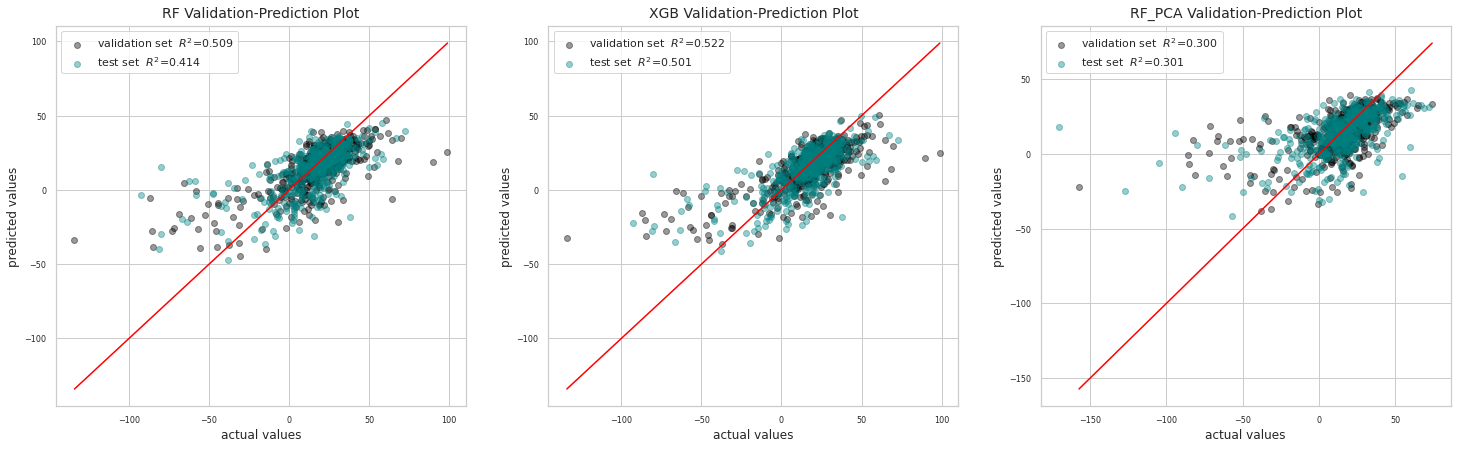

In [406]:
fig, ax = plt.subplots(1,3, figsize=(25, 7) ,sharey=False)

name_models = ['RF', 'XGB','RF_PCA']
final_models = [ rf_final, xgb_final, rf_PCA_final]

for model,name in zip(final_models, name_models):
    if name=='RF_PCA':
        y_pred_val = model.predict(X_val_PCA)
        y_pred_test = model.predict(X_test_PCA)
        R2v=model.score(X_val_PCA, y_val_PCA)
        R2t=model.score(X_test_PCA, y_test_PCA)
        val_vs_predict_plot(y_val_PCA, y_pred_val, y_test_PCA, y_pred_test, name)
    else:
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        R2v=model.score(X_val, y_val)
        R2t=model.score(X_test, y_test)
        val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, name) 
        
#plt.savefig("Validation_Prediction_Plots.png", bbox_inches = 'tight')

Feature Importance

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

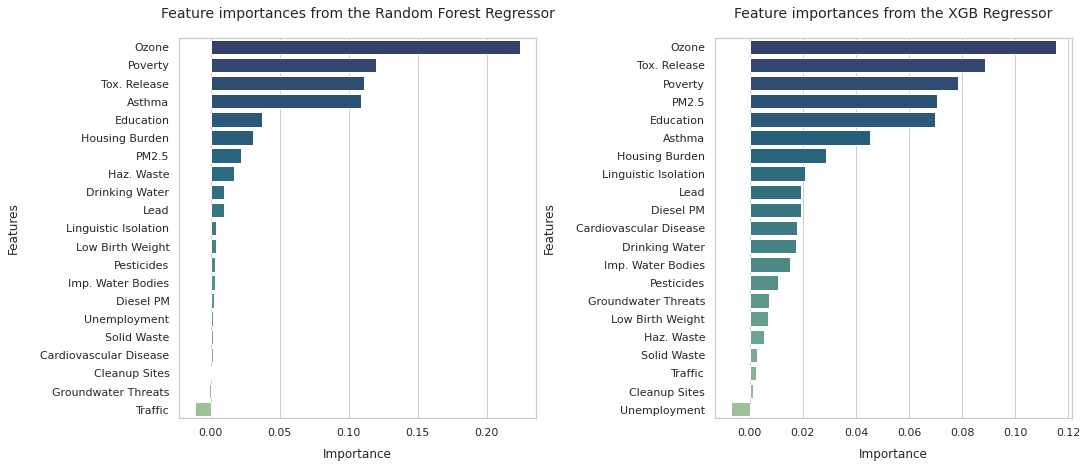

In [407]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1,2, figsize=(16, 7) ,sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)

#plot 1
sns.barplot( x="Importance", y=imp.index.values, ax=ax[0],data=imp,order = imp.index.values, palette="crest_r")
ax[0].set_xlabel("Importance", fontsize = 12,labelpad = 10)
ax[0].set_ylabel("Features",fontsize = 12,labelpad = 20)
ax[0].set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plot 2
sns.barplot( x="Importance", y=impx.index.values, data=impx,ax=ax[1], order = impx.index.values, palette="crest_r")
ax[1].set_xlabel("Importance", fontsize = 12, labelpad = 10)
ax[1].set_ylabel("Features",fontsize = 12, labelpad = 20)
ax[1].set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("FeatureImportance_comparison.png", bbox_inches = 'tight', dpi=300)

<a id="ID_disc"></a>
## 7.0 | Discussion 

NOTES:
    
* need 2-3 visualisations

e.g.

1. feature importance plots
2. table of model comparison + PCA comparison?


Limitations:
    
spatial autocorrelation - spatial dimension [PAPER: Examining the spatial relationship between environmental health factors and
house prices: NO 2 problem?]


2020-2021 covid


spatial unit


ANN

[link](https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/)

This template can be used to fit the Deep Learning ANN regression model on any given dataset.

You can take the pre-processing steps of raw data from any of the case studies here.

Deep ANNs work great when you have a good amount of data available for learning. For small datasets with less than 50K records, I will recommend using the supervised ML models like Random Forests, Adaboosts, XGBoosts, etc.

The simple reason behind this is the high complexity and large computations of ANN. It is not worth it, if you can achieve the same accuracy with a faster and simpler model.

You look at deep learning ANNs only when you have a large amount of data available and the other algorithms are failing or do not fit for the task.

<a id="ID_conc"></a>
## 8.0 | Conclusion

<a id="ID_biblio"></a>
## Bibliography

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In [208]:
https://nycdatascience.com/blog/student-works/house-price-prediction-using-machine-learning-techniques/

SyntaxError: invalid syntax (3753197542.py, line 1)

In [ ]:
https://datascienceplus.com/principal-component-analysis-pca-with-python/

<a id="ID_append"></a>
## Appendix